### GROUND MOTION INPUT

<>:13: SyntaxWarning: invalid escape sequence '\_'
<>:13: SyntaxWarning: invalid escape sequence '\_'
C:\Users\adria\AppData\Local\Temp\ipykernel_9564\1438320716.py:13: SyntaxWarning: invalid escape sequence '\_'
  file_path = "D:\_Publication\\2025_Analisis respons spektrum\\code\\GMR\\MYG0041103111446.EW"


Skipping invalid value: Scale
Skipping invalid value: Factor
Skipping invalid value: 3920(gal)/6182761
Skipping invalid value: Max.
Skipping invalid value: Acc.
Skipping invalid value: (gal)
Skipping invalid value: 1268.488
Skipping invalid value: Last
Skipping invalid value: Correction
Skipping invalid value: 2011/03/11
Skipping invalid value: 14:46:36
Skipping invalid value: Memo.


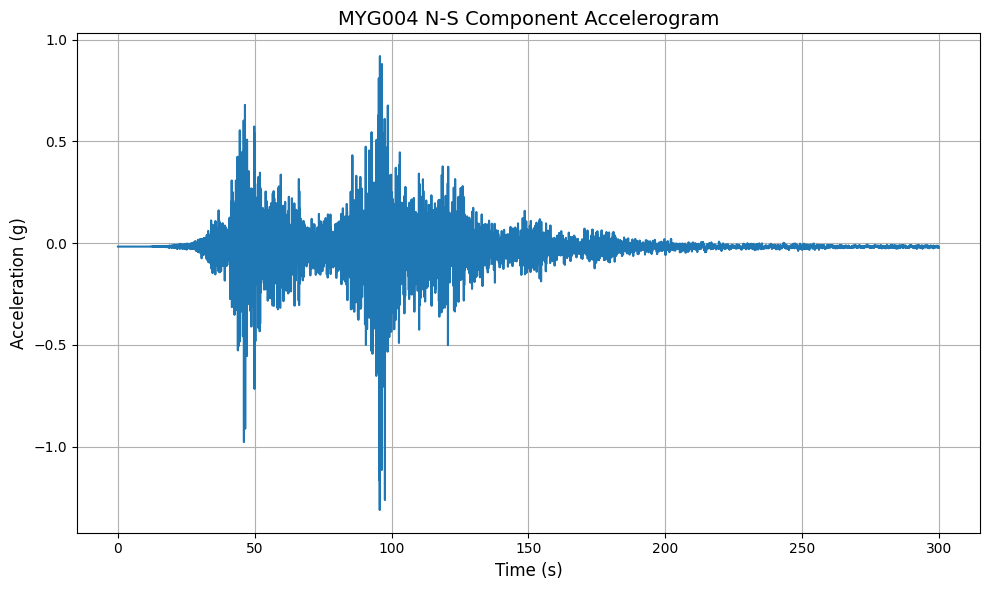

Accelerogram data saved to D:\_Publication\2025_Analisis respons spektrum\code\GMR\MYG0041103111446_accelerogram_data.csv


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Data Parameters 
record_time_hour = 14
record_time_minute = 46
record_time_second = 51
sampling_frequency = 100
duration = 300
scale_factor_gal_to_g = 1.0 / 980.665
scale_factor_raw_to_gal = 3920.0 / 6182761.0
file_path = "D:\_Publication\\2025_Analisis respons spektrum\\code\\GMR\\MYG0041103111446.EW"


filename_without_ext, _ = os.path.splitext(os.path.basename(file_path))
output_file = os.path.join(os.path.dirname(file_path), f"{filename_without_ext}_accelerogram_data.csv")

time_seconds_from_origin = np.linspace(0, duration, int(sampling_frequency * duration), endpoint=False)
time = time_seconds_from_origin + (record_time_hour * 3600 + record_time_minute * 60 + record_time_second)

acceleration = []
try:
    with open(file_path, 'r') as f:
        for _ in range(13):
            next(f)

        for line in f:
            values = line.split()
            for value in values:
                try:
                    raw_value = int(value)
                    accel_gal = raw_value * scale_factor_raw_to_gal
                    accel_g = accel_gal * scale_factor_gal_to_g
                    acceleration.append(accel_g)
                except ValueError:
                    print(f"Skipping invalid value: {value}")
                    pass

    acceleration = np.array(acceleration)

    # Plotting 
    plt.figure(figsize=(10, 6))
    plt.plot(time_seconds_from_origin, acceleration)  
    plt.xlabel("Time (s)", fontsize=12)  
    plt.ylabel("Acceleration (g)", fontsize=12)
    plt.title("MYG004 N-S Component Accelerogram", fontsize=14)
    plt.grid(True)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

    data = np.column_stack([time_seconds_from_origin, acceleration])
    np.savetxt(output_file, data, delimiter=',', header='Time (s),Acceleration (g)', fmt='%.8f')
    print(f"Accelerogram data saved to {output_file}")


except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

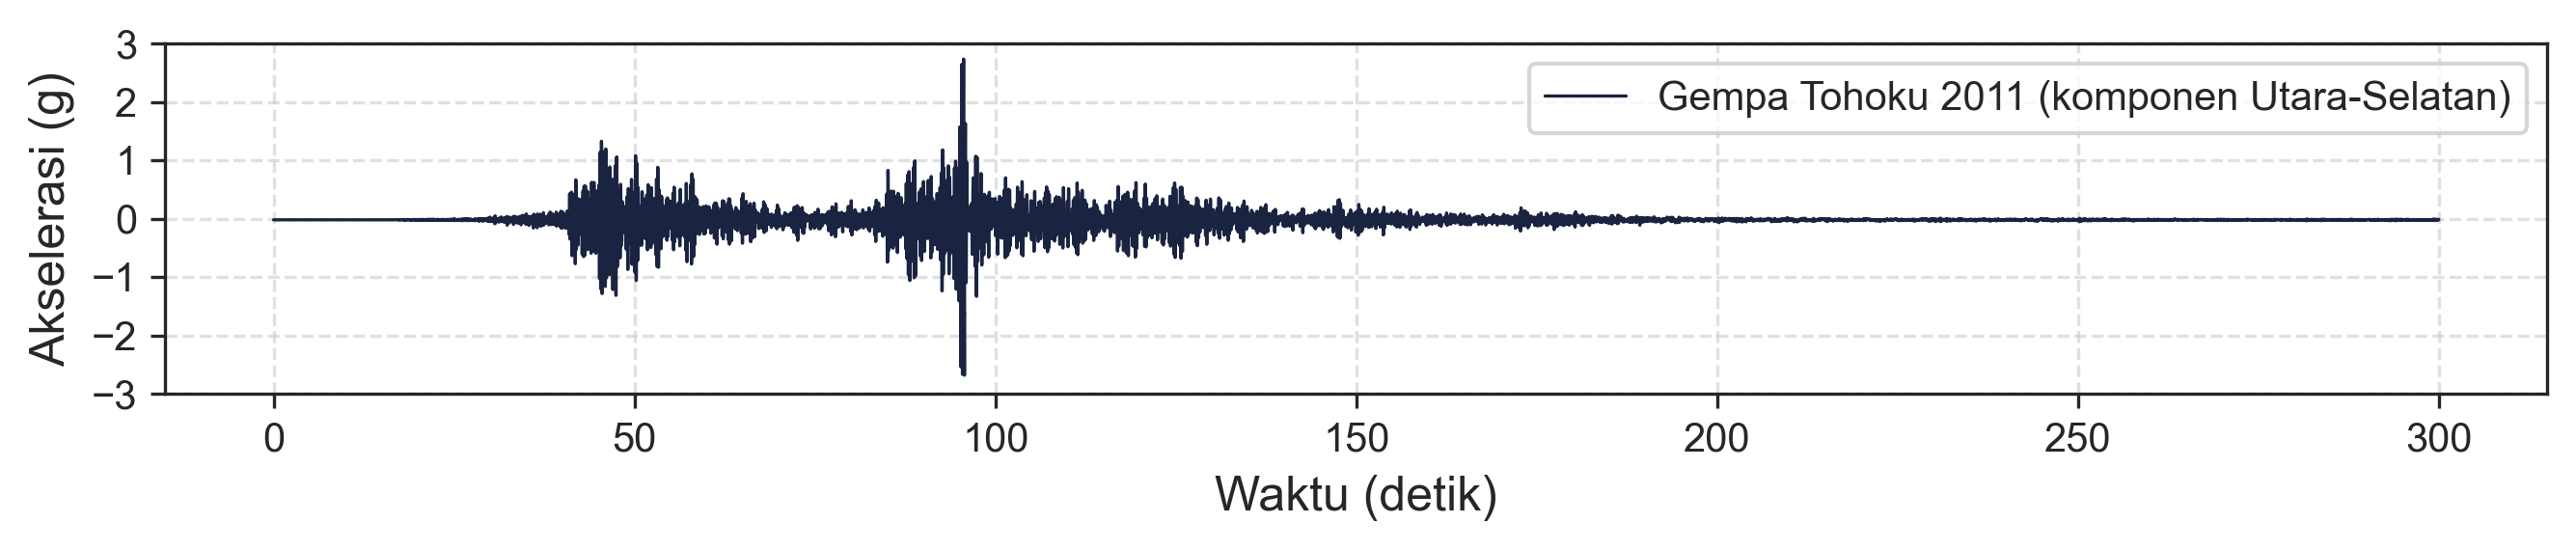

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style and palette
sns.set_style("ticks")  # other styles: 'darkgrid', 'ticks', 'dark', 'white'
sns.set_palette("cubehelix")    # other palettes: 'deep', 'muted', 'bright', 'pastel'

# Read the data with proper formatting
file_path = r"D:\_Publication\2025_Analisis respons spektrum\code\GMR\Tohoku_2011_MYG_004_NS.csv"
df = pd.read_csv(file_path,
                 sep=',',       
                 header=None,    
                 names=['time', 'acceleration'],
                 skiprows=1)

# Create the plot
plt.figure(figsize=(9, 2), dpi=300)
plt.plot(df['time'], df['acceleration'], 
         linewidth=0.8, 
         label='Gempa Tohoku 2011 (komponen Utara-Selatan)')

# Control axis limits and intervals
# x_min, x_max = 20, 200 
y_min, y_max = -3, 3    
x_interval = 20         
y_interval = 1 
# plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
# plt.xticks(np.arange(x_min, x_max + x_interval, x_interval), fontsize=10, fontname='Arial')
plt.yticks(np.arange(y_min, y_max + y_interval, y_interval), fontsize=10, fontname='Arial')

plt.xlabel("Waktu (detik)", fontsize=12)
plt.ylabel("Akselerasi (g)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(frameon=True)
plt.tight_layout()

plt.show()

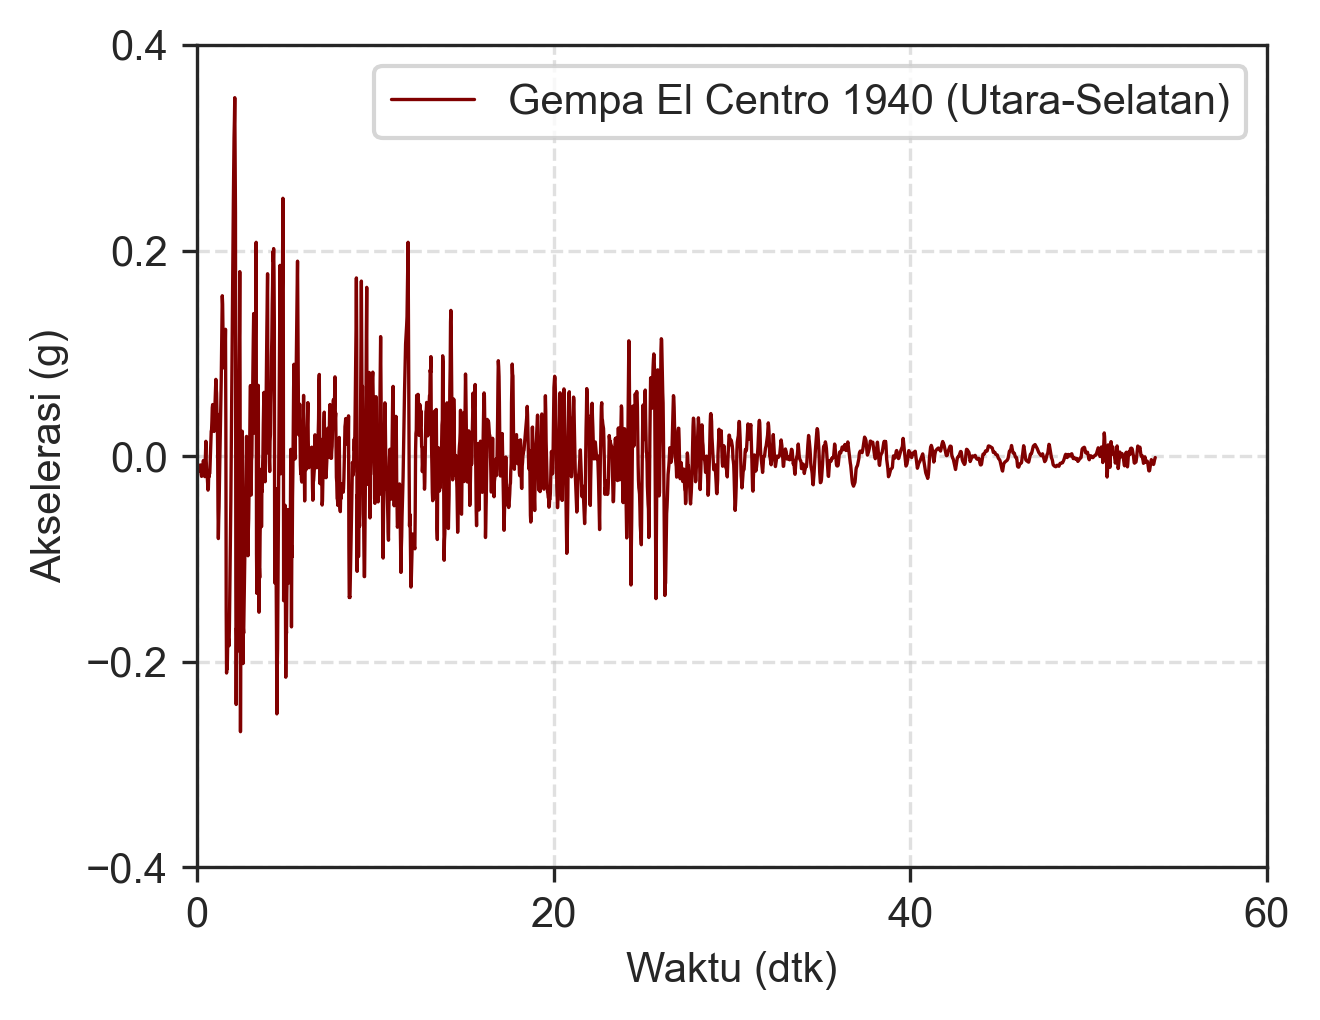

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style and palette
sns.set_style("ticks")  # other styles: 'darkgrid', 'ticks', 'dark', 'white'
sns.set_palette("cubehelix")    # other palettes: 'deep', 'muted', 'bright', 'pastel'

# Read the data with proper formatting
file_path = r"D:\_Publication\2025_Analisis respons spektrum\code\GMR\EL_Centro_NS.csv"
df = pd.read_csv(file_path,
                 sep=',',       
                 header=None,    
                 names=['time', 'acceleration'],
                 skiprows=1)

# Create the plot
plt.figure(figsize=(4.5, 3.5), dpi=300)
plt.plot(df['time'], df['acceleration'], 
         linewidth=0.8, 
         label='Gempa El Centro 1940 (Utara-Selatan)',
         color="#800000")

# Control axis limits and intervals
x_min, x_max = 0, 50  
y_min, y_max = -0.4, 0.4    
x_interval = 20         
y_interval = 0.2        
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(np.arange(x_min, x_max + x_interval, x_interval), fontsize=10, fontname='Arial')
plt.yticks(np.arange(y_min, y_max + y_interval, y_interval), fontsize=10, fontname='Arial')

plt.xlabel("Waktu (dtk)", fontsize=10)
plt.ylabel("Akselerasi (g)", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(frameon=True, loc='upper right')
plt.tight_layout()

# Show plot
plt.show()

### PART A: ELASTIC RESPONSE SPECTRUM

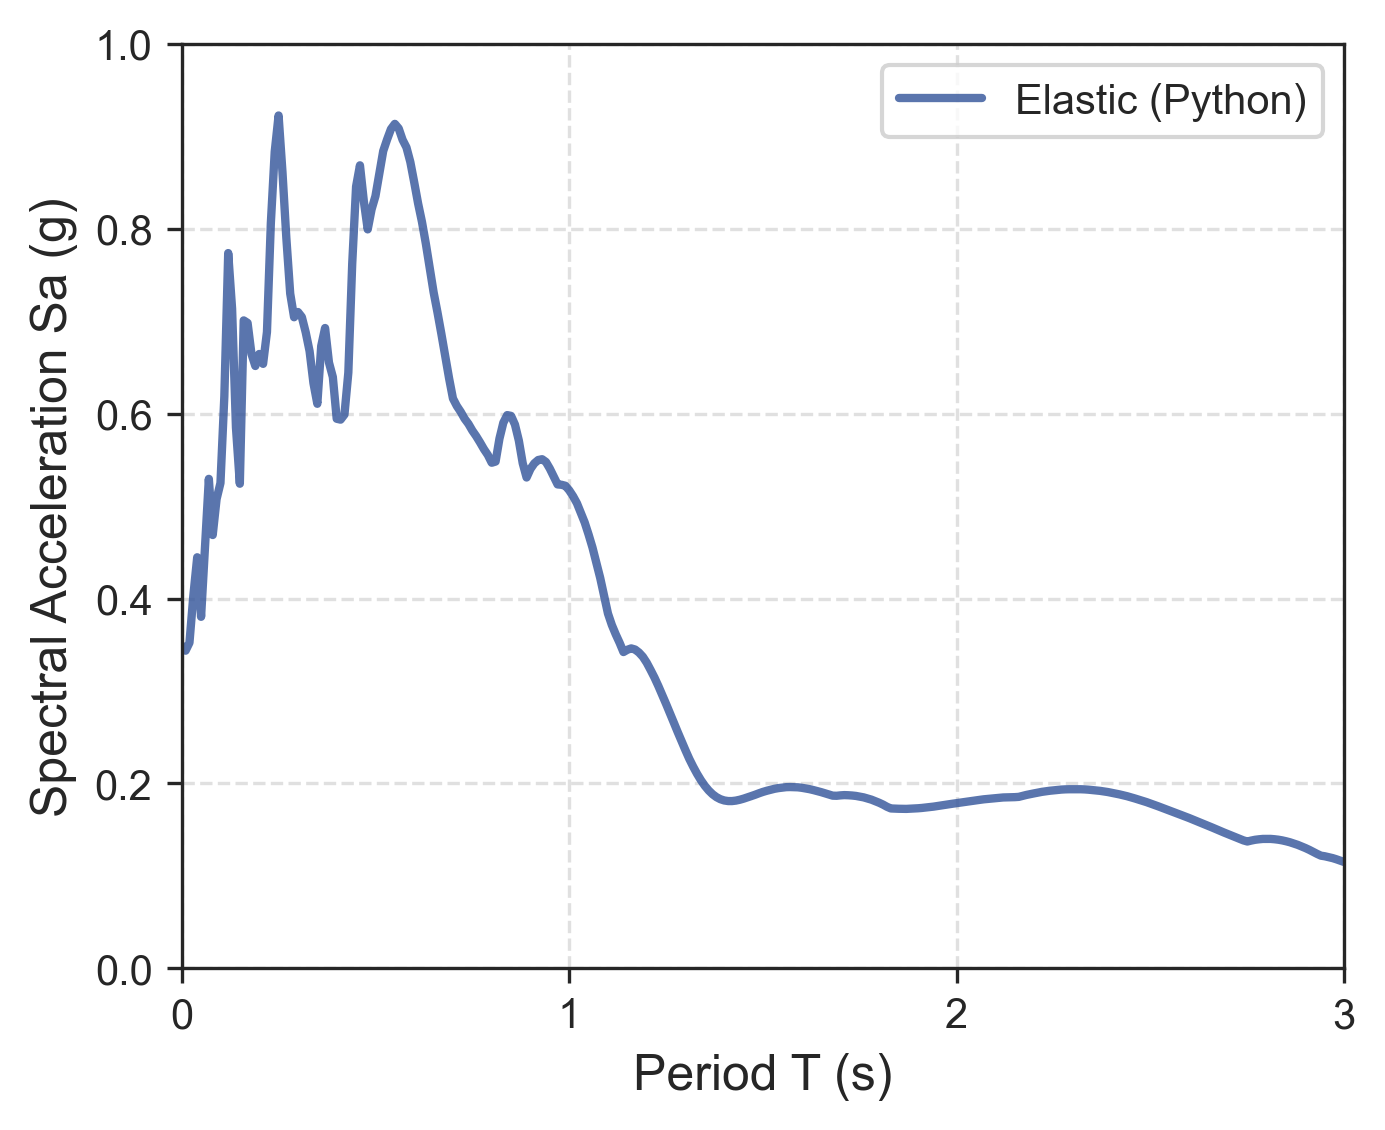

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

def newmark_response(T, dt, ag, m=1.0, zeta=0.05, gamma=0.5, beta=0.25):
    """
    Compute the time-history response of a single-degree-of-freedom oscillator
    to ground acceleration using the Newmark constant average acceleration method.
    
    The equation of motion for the relative displacement u (measured from the ground)
    is:
    
        m * ü + c * u̇ + k * u = - ag(t)
    
    where m = 1 (unit mass), k = m * (2π/T)^2, and c = 2*m*ζ*(2π/T).
    
    Parameters:
    -----------
    T : float
        Oscillator period (s).
    dt : float
        Time step (s).
    ag : ndarray
        Ground acceleration time history (in g). It is assumed that ag[0] corresponds to t=0.
    m : float, optional
        Mass of the oscillator (default is 1.0).
    zeta : float, optional
        Damping ratio (default is 0.05, i.e., 5% damping).
    gamma : float, optional
        Newmark parameter γ (default is 0.5 for constant average acceleration).
    beta : float, optional
        Newmark parameter β (default is 0.25 for constant average acceleration).
    
    Returns:
    --------
    Sa : float
        The spectral acceleration (in g) defined as the maximum absolute value of the absolute acceleration,
        i.e. the maximum of |ü + ag|.
    u, v, a, a_abs : ndarrays
        The time histories of displacement, velocity, relative acceleration, and absolute acceleration, respectively.
    """
    # Compute the natural frequency (rad/s) and stiffness
    omega = 2 * np.pi / T
    k = m * omega**2
    c = 2 * m * zeta * omega

    # Number of time steps in the ground motion record
    N = len(ag)
    
    # Initialize response arrays: displacement (u), velocity (v), and relative acceleration (a)
    u = np.zeros(N)
    v = np.zeros(N)
    a = np.zeros(N)
    
    # Initial conditions: u(0) = 0, v(0) = 0.
    # Compute initial acceleration from the equation of motion:
    #   m*ü(0) + c*0 + k*0 = - ag(0)   -->   ü(0) = -ag(0)
    a[0] = -ag[0]

    # Effective stiffness for Newmark integration:
    K_eff = k + m/(beta * dt**2) + c*(gamma/(beta * dt))

    # Time integration using Newmark’s method:
    for i in range(N - 1):
        R_eff = (-ag[i+1] +
                 m * (u[i] / (beta * dt**2) + v[i] / (beta * dt) + (1/(2*beta) - 1) * a[i]) +
                 c * (gamma/(beta * dt) * u[i] + (gamma/beta - 1) * v[i] + dt*(gamma/(2*beta) - 1)*a[i]))
        # Solve for the displacement at t_{i+1}
        u[i+1] = R_eff / K_eff
        
        # Update acceleration at t_{i+1} using the Newmark formula:
        a[i+1] = (u[i+1] - u[i])/(beta * dt**2) - v[i]/(beta * dt) - (1/(2*beta) - 1)*a[i]
        
        # Update velocity at t_{i+1} using the average acceleration formula:
        v[i+1] = v[i] + dt*((1 - gamma)*a[i] + gamma*a[i+1])
    
    # Compute the absolute acceleration. Since u is the displacement relative to the ground,
    # the absolute acceleration is ü + ag.
    a_abs = a + ag
    
    # The spectral acceleration (Sa) is the peak (maximum absolute) value of the absolute acceleration.
    Sa = np.max(np.abs(a_abs))
    
    return Sa, u, v, a, a_abs

def compute_response_spectrum(file_path, T_vals, zeta=0.05):
    """
    Read the ground motion data from file and compute the elastic response spectrum (Sa vs. T).
    
    Parameters:
    -----------
    file_path : str
        Full path to the ground motion file (should contain two columns: time (s) and acceleration (g)).
    T_vals : array_like
        Array of oscillator periods (s) for which to compute the spectrum.
    zeta : float, optional
        Damping ratio (default is 0.05).
    
    Returns:
    --------
    T_vals : ndarray
        The array of periods (s).
    Sa_vals : ndarray
        The computed spectral accelerations (g) for each period.
    time : ndarray
        Time vector from the ground motion file.
    ag : ndarray
        Ground acceleration time history (g).
    """
    # Load the ground motion data (assumes whitespace-delimited columns)
    data = pd.read_csv(file_path,
                    sep=',',       
                    header=None,    
                    names=['time', 'acceleration'],
                    skiprows=1)

    time = data['time'].values  # Extract time column as numpy array
    ag = data['acceleration'].values  # Extract acceleration column as numpy array
    
    # Determine the time step (assumes constant dt)
    dt = time[1] - time[0]
    
    Sa_vals = []
    # Loop over each period value and compute the response
    for T in T_vals:
        Sa, _, _, _, _ = newmark_response(T, dt, ag, m=1.0, zeta=zeta, gamma=0.5, beta=0.25)
        Sa_vals.append(Sa)
    Sa_vals = np.array(Sa_vals)
    return T_vals, Sa_vals, time, ag

if __name__ == '__main__':
    # ================================
    # 1. Define the ground motion file
    # ================================
    file_path = r'D:\_Publication\2025_Analisis respons spektrum\code\GMR\EL_Centro_NS.csv'

    # =======================================
    # 2. Define the range of oscillator periods
    # =======================================
    # For example, test oscillators from 0.01 s (very stiff) to 5.0 s (very flexible)
    Tstep = 0.01
    T_min = 0.001   # minimum period in seconds
    T_max = 3    # maximum period in seconds
    T_vals = np.arange(Tstep, T_max + Tstep, Tstep)
    T_vals = np.insert(T_vals, 0, T_min)
    
    # ================================
    # 3. Compute the response spectrum
    # ================================
    T_vals, Sa_vals, time, ag = compute_response_spectrum(file_path, T_vals, zeta=0.05)

    # ================================
    # 4. Save file
    # ================================
        # Create the 'output' directory if it doesn't exist
    output_directory = 'output'
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
        
    output_data = np.column_stack((T_vals, Sa_vals))  
    output_file = os.path.join(output_directory, 'rs_elasticpython.csv')  
    np.savetxt(output_file, output_data, delimiter=',', fmt='%.6f') 

    # ================================
    # 5. Plot the Response Spectrum
    # ================================
    
    sns.set_style("ticks") # other styles: 'darkgrid', 'ticks', 'dark', 'white'
   
    plt.figure(figsize=(5, 4), dpi=300)
    plt.plot(T_vals, Sa_vals, linestyle='-', linewidth=2, color="#315399", label='Elastic (Python)', alpha=0.8)
    plt.xlabel('Period T (s)', fontsize=12)
    plt.ylabel('Spectral Acceleration Sa (g)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    
    # Control axis limits and intervals
    x_min, x_max = 0, 3  
    y_min, y_max = 0, 1    
    x_interval = 1        
    y_interval = 0.2        
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(np.arange(x_min, x_max + x_interval, x_interval), fontsize=10, fontname='Arial')
    plt.yticks(np.arange(y_min, y_max + y_interval, y_interval), fontsize=10, fontname='Arial')    
        
    # Set the interval for the x and y axis labels
    # plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))  
    # plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1))    
    plt.show()


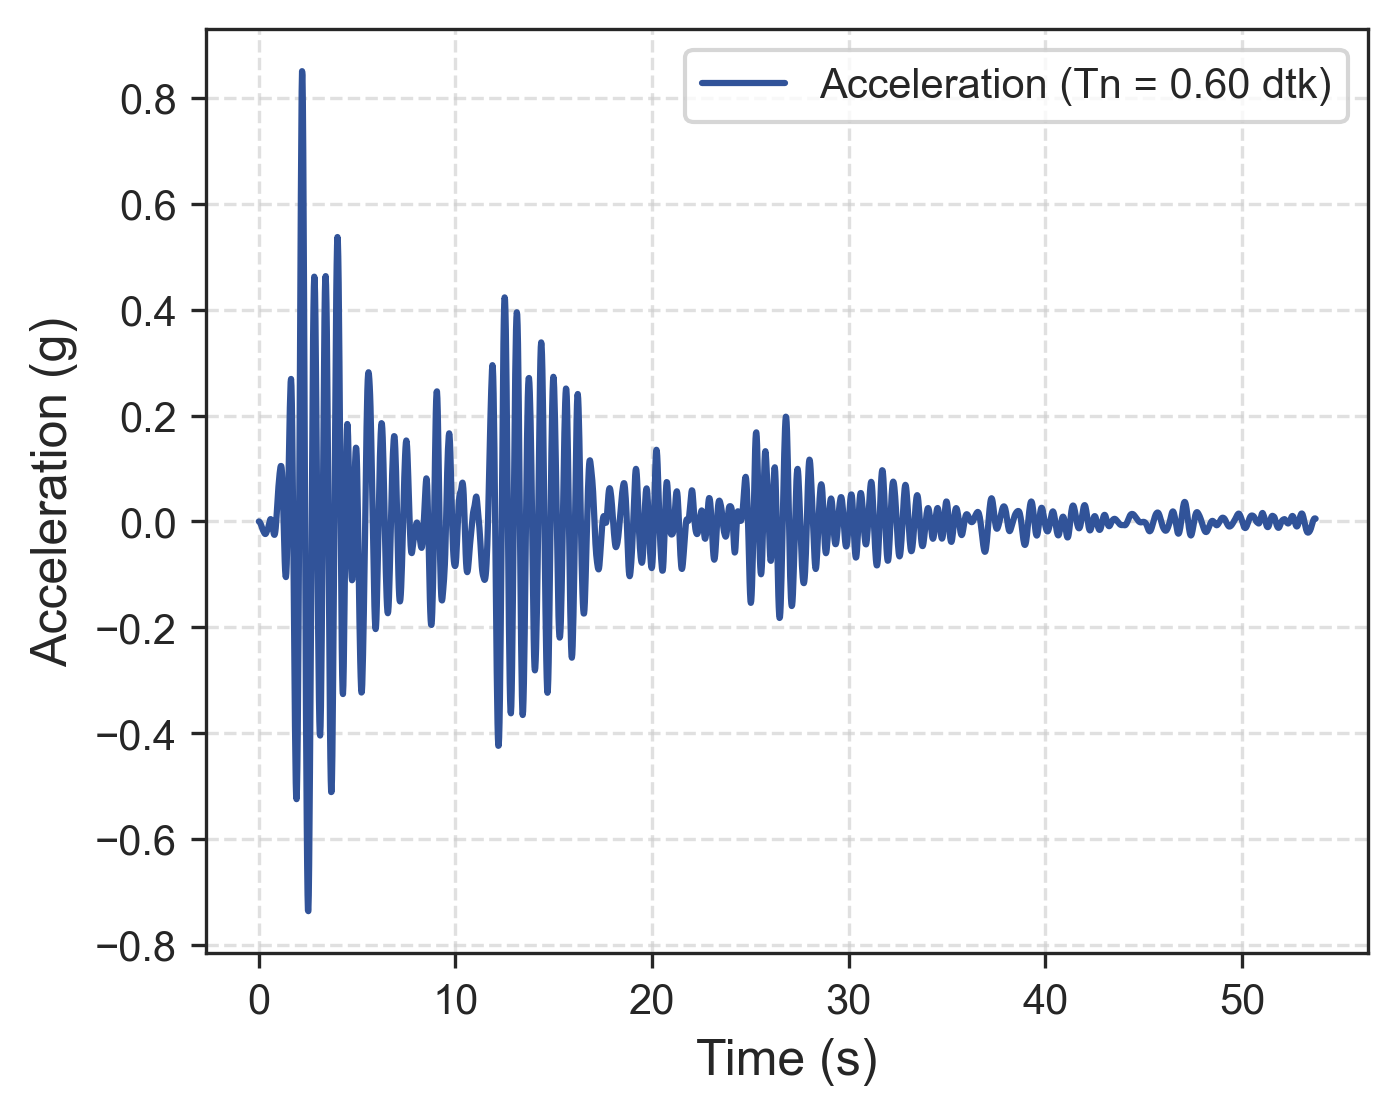

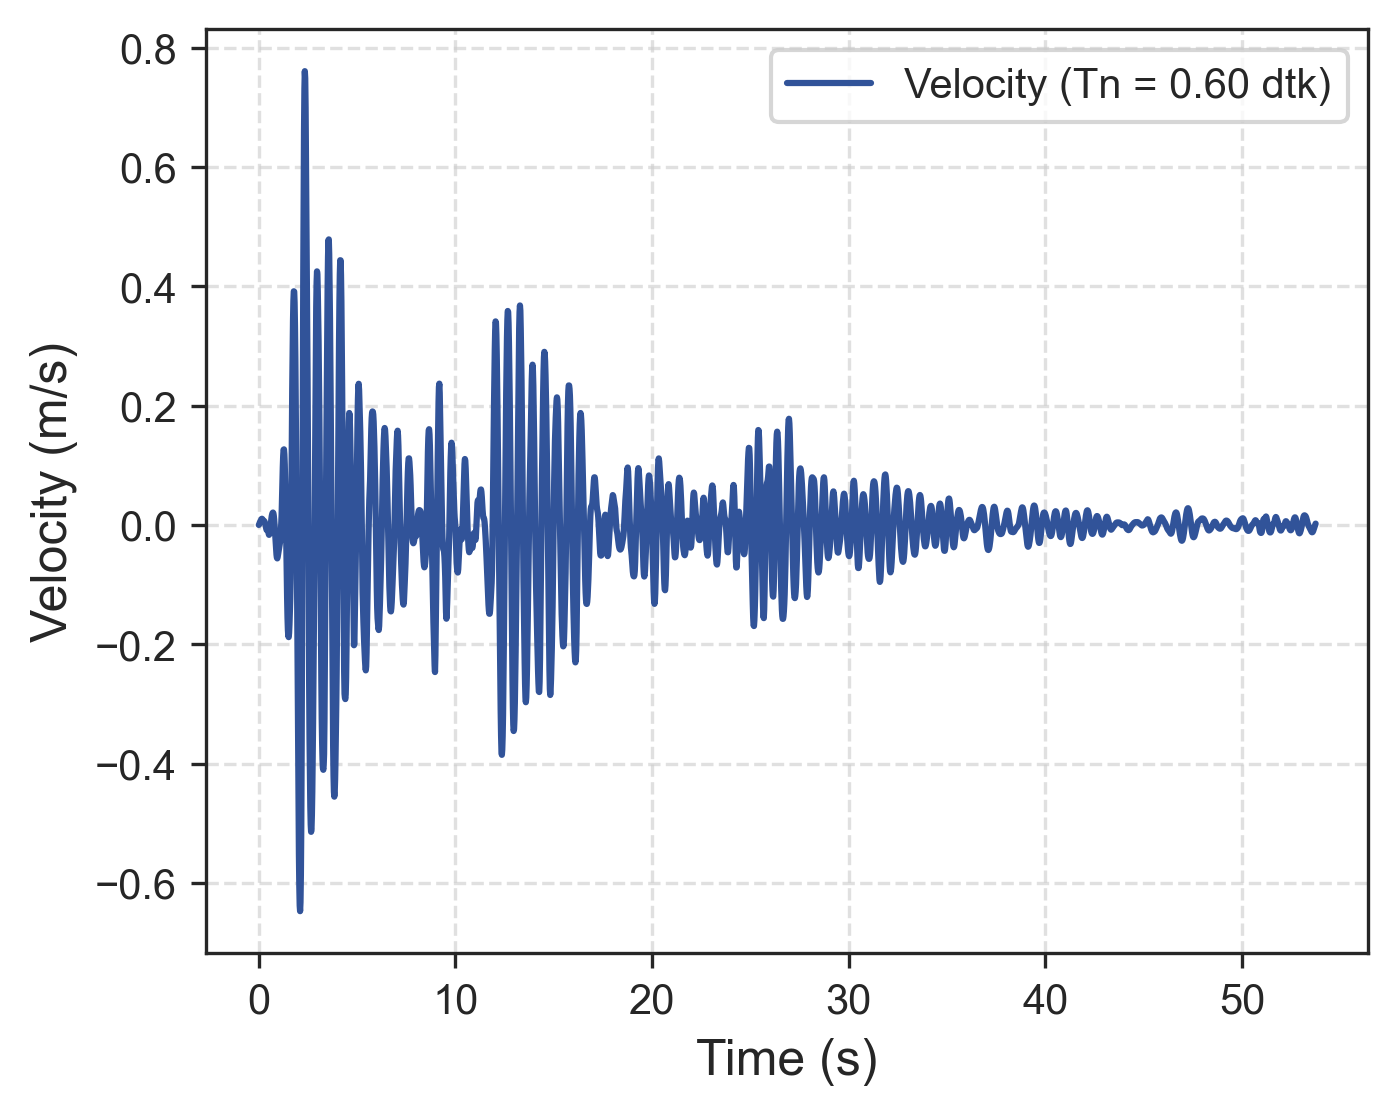

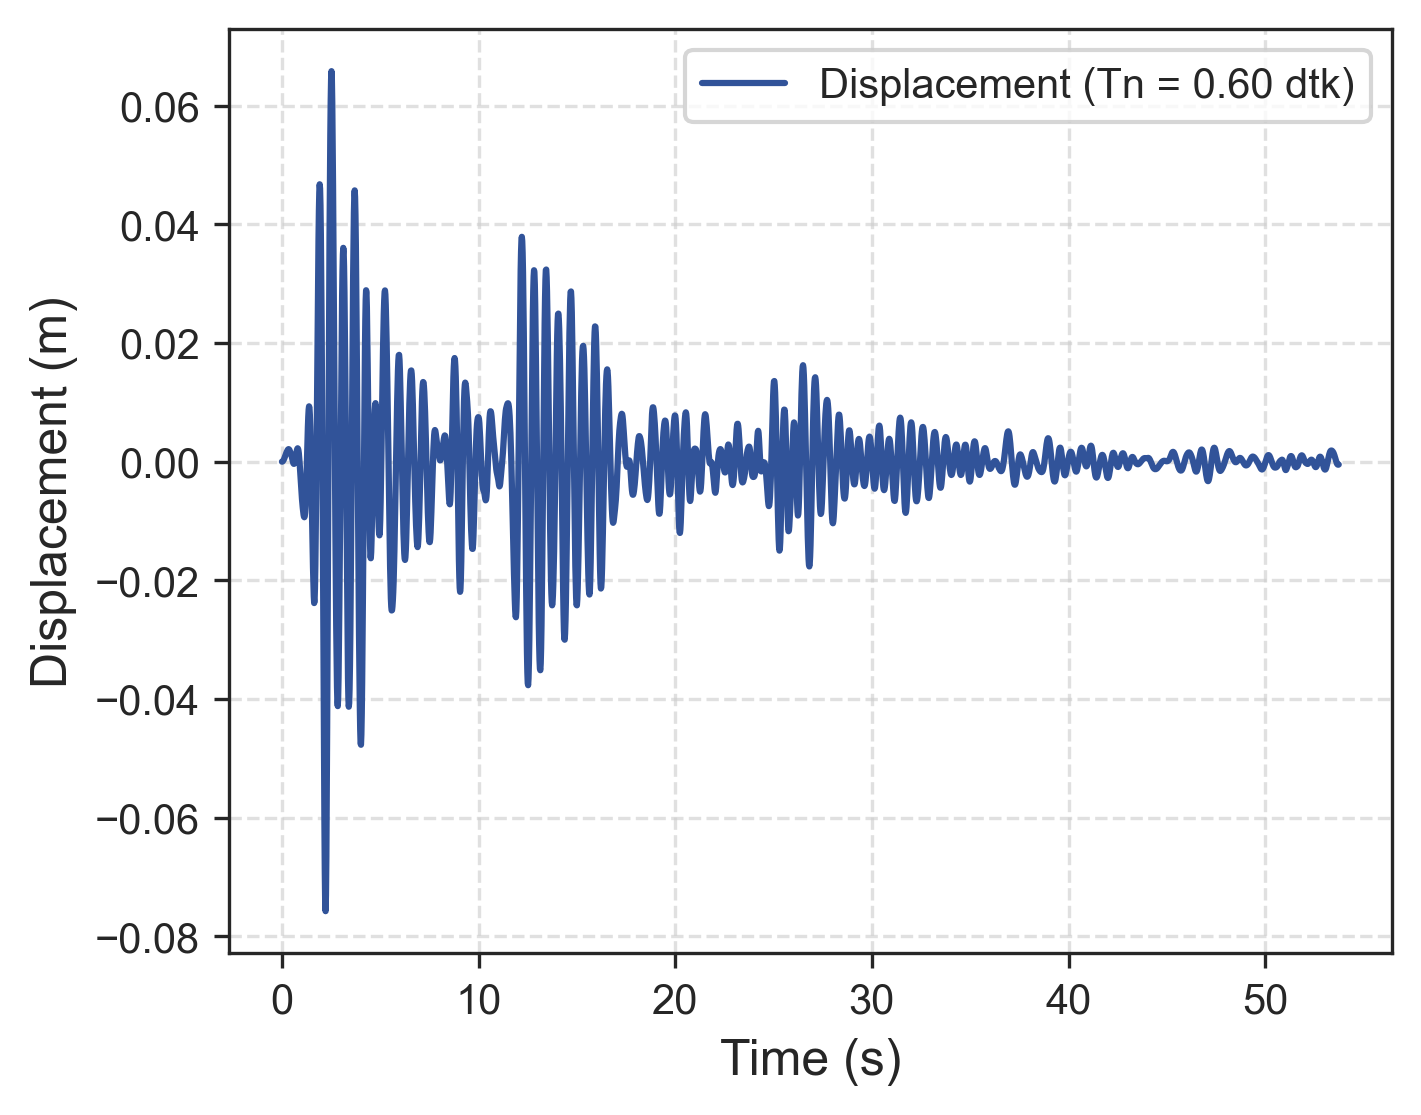

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

def newmark_response(T, dt, ag, m, zeta=0.05, gamma=0.5, beta=0.25):
    # Compute the natural frequency (rad/s) and stiffness
    omega = 2 * np.pi / T
    k = m * omega**2
    c = 2 * m * zeta * omega

    # Number of time steps in the ground motion record
    N = len(ag)
    
    # Initialize response arrays: displacement (u), velocity (v), and relative acceleration (a)
    u = np.zeros(N)
    v = np.zeros(N)
    a = np.zeros(N)
    
    # Initial conditions: u(0) = 0, v(0) = 0.
    a[0] = -ag[0]

    # Effective stiffness for Newmark integration:
    K_eff = k + m/(beta * dt**2) + c*(gamma/(beta * dt))

    # Time integration using Newmark’s method:
    for i in range(N - 1):
        R_eff = (-ag[i+1] +
                 m * (u[i] / (beta * dt**2) + v[i] / (beta * dt) + (1/(2*beta) - 1) * a[i]) +
                 c * (gamma/(beta * dt) * u[i] + (gamma/beta - 1) * v[i] + dt*(gamma/(2*beta) - 1)*a[i]))
        u[i+1] = R_eff / K_eff
        
        a[i+1] = (u[i+1] - u[i])/(beta * dt**2) - v[i]/(beta * dt) - (1/(2*beta) - 1)*a[i]
        
        v[i+1] = v[i] + dt*((1 - gamma)*a[i] + gamma*a[i+1])
    
    # Compute the absolute acceleration (a_abs = a + ag)
    a_abs = a + ag
    return u, v, a, a_abs

def plot_responses(file_path, T, m, zeta=0.05):
    # Load the ground motion data (assumes whitespace-delimited columns)
    data = pd.read_csv(file_path, sep=',', header=None, names=['time', 'acceleration'], skiprows=1)
    time = data['time'].values
    ag = data['acceleration'].values

    # Determine the time step (assumes constant dt)
    dt = time[1] - time[0]

    # Get the response for the given period and mass
    u, v, a, a_abs = newmark_response(T, dt, ag, m, zeta)
    
    # Create lists for velocity and displacement
    Velo = v * g  
    Disp = u * g  
    
    sns.set_style("ticks") # other styles: 'darkgrid', 'ticks', 'dark', 'white'

    # Plot the acceleration response (absolute acceleration)
    plt.figure(figsize=(5, 4), dpi=300)
    plt.plot(time, a_abs, label=f'Acceleration (Tn = {T:.2f} dtk)', linewidth=1.5, color="#315399")
    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel('Acceleration (g)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()
    
    # Plot the acceleration response (velocity)
    plt.figure(figsize=(5, 4), dpi=300)
    plt.plot(time, Velo, label=f'Velocity (Tn = {T:.2f} dtk)', linewidth=1.5, color="#315399")
    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel('Velocity (m/s)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()
    
    # Plot the acceleration response (displacement)
    plt.figure(figsize=(5, 4), dpi=300)
    plt.plot(time, Disp, label=f'Displacement (Tn = {T:.2f} dtk)', linewidth=1.5, color="#315399")
    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel('Displacement (m)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()
    
    # Return the results for later use
    return time, a_abs, Velo, Disp

if __name__ == '__main__':
    # Define the ground motion file
    file_path = r'D:\_Publication\2025_Analisis respons spektrum\code\GMR\EL_Centro_NS.csv'
    
    # Define the period T and mass m
    T = 0.6  # Period in sec
    m = 1  # Mass in Ton
    g = 9.81  # gravity constant in m/s^2 
    
    # Capture the returned values from plot_responses
    time, a_abs, Velo, Disp = plot_responses(file_path, T, m)
    
    # Create the 'output' directory if it doesn't exist
    output_directory = 'output'
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
        
    # Stack the data columns into a single array
    output_data = np.column_stack((time, a_abs, Velo, Disp))
    
    # Save the data to a CSV file
    df = pd.DataFrame(output_data, columns=['Time', 'Acceleration', 'Velocity', 'Displacement'])
    output_file = os.path.join(output_directory, 'elastic_response_python.csv')
    df.to_csv(output_file, index=False, float_format='%.6f')


### PART B. RESPONS SPEKTRUM ELASTIK (OPENSEES)

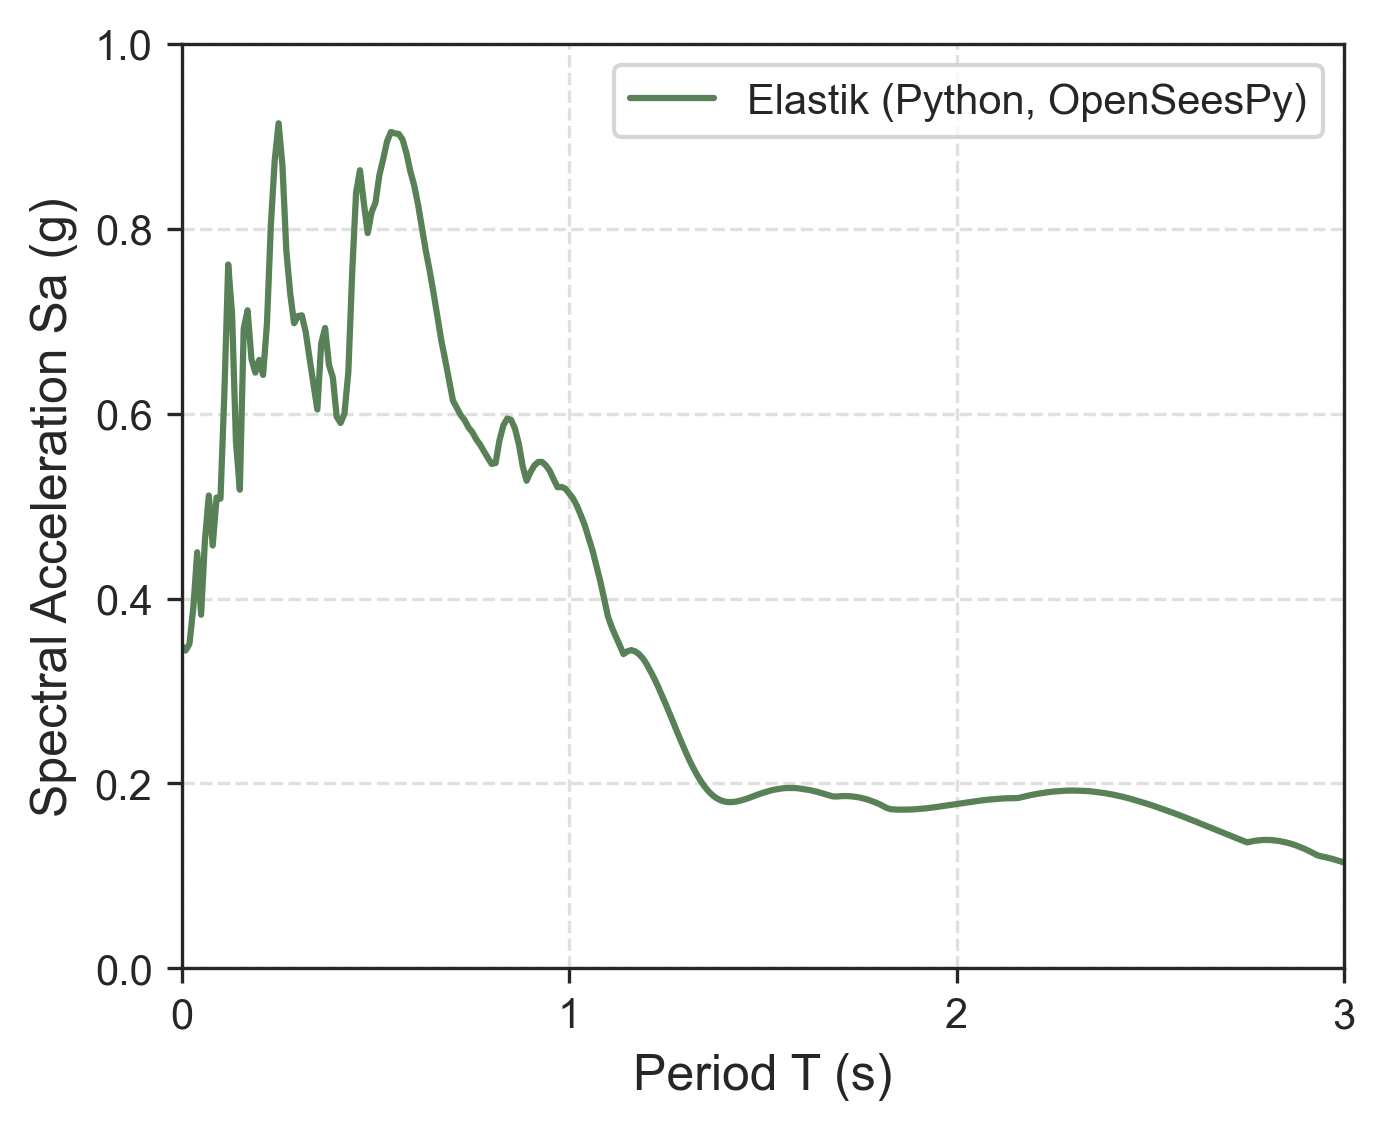

In [7]:
import openseespy.opensees as ops
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Parameters
g = 9.81  # Gravity constant
damping_ratio = 0.05
Tinit = 0.000001
Tmax = 3
Tstep = 0.01
Tn = np.arange(Tstep, Tmax + Tstep, Tstep)
Tn = np.insert(Tn, 0, Tinit) 

gmrs_SF = 1 # ground motion scale factor

# Path to ground motion record
gmrs_folderpath = r'D:\_Publication\2025_Analisis respons spektrum\code\GMR\EL_Centro_NS.csv'
GMRS = pd.read_csv(gmrs_folderpath, 
                   sep=',',
                   header=None,
                   skiprows=1)

GMRS_acc = (GMRS.iloc[:, 1] * gmrs_SF).tolist() 
dt = abs(GMRS.iloc[1, 0] - GMRS.iloc[0, 0])
nPts = len(GMRS)

Acc = []

# Function to run the analysis for each period
for T in Tn:
    ops.wipe()
    ops.model('Basic', '-ndm', 1, '-ndf', 1)
    
    # Calculate stiffness (Ke) and mass (Mass)
    Mass = 1  
    omega = 2 * np.pi / T 
    Ke = omega ** 2 * Mass  

    # Nodes and elements
    ops.node(1, 0)
    ops.node(2, 0)
    ops.mass(2, Mass)
    ops.fix(1, 1)
    ops.fix(2, 0)
    
    ops.uniaxialMaterial('Elastic', 1, Ke)
    ops.element('zeroLength', 1, 1, 2, "-mat", 1, "-dir", 1, '-doRayleigh', 1)

    # Ground motion record
    ops.timeSeries('Path', 2, '-values', *GMRS_acc, '-dt', dt, '-factor', g, '-prependZero')
    ops.pattern('UniformExcitation', 1, 1, '-accel', 2)

    # Damping
    betaKcomm = 2.0 * damping_ratio / omega 
    ops.rayleigh(0.0, 0.0, 0.0, betaKcomm)

    # Analysis settings
    ops.wipeAnalysis()
    ops.system('BandGeneral')
    ops.constraints('Plain')
    ops.test('NormDispIncr', 1.0e-12, 100, 0)
    ops.algorithm('Newton')
    ops.numberer('RCM')
    ops.integrator('Newmark', 0.5, 0.25)
    ops.analysis('Transient')

    # Run analysis
    ok = 0
    u1 = []

    while ok == 0 and ops.getTime() < dt * nPts:
        ok = ops.analyze(1, dt)
        if ok != 0:
            ops.test('NormDispIncr', 1.0e-12, 100, 0)
            ops.algorithm('ModifiedNewton', '-initial')
            ok = ops.analyze(1, dt)

            if ok == 0:
                ops.test('NormDispIncr', 1.0e-12, 10)
                ops.algorithm('Newton')

        u1.append(abs(ops.nodeDisp(2, 1)))

    # Store results
    Acc.append(max(u1) * (omega**2) / g)

output_directory = 'output'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
    
output_data = np.column_stack((Tn, Acc))  
output_file = os.path.join(output_directory, 'rs_elasticopenseespy.csv')  
np.savetxt(output_file, output_data, delimiter=',', fmt='%.6f') 

# Plotting response spectrum
sns.set_style("ticks") # other styles: 'darkgrid', 'ticks', 'dark', 'white'
   
plt.figure(figsize=(5, 4), dpi=300)
plt.plot(Tn, Acc, color="#588157", label="Elastik (Python, OpenSeesPy)")
plt.xlabel('Period T (s)', fontsize=12)
plt.ylabel('Spectral Acceleration Sa (g)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Control axis limits and intervals
x_min, x_max = 0, 3  
y_min, y_max = 0, 1  
x_interval = 1       
y_interval = 0.2     
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(np.arange(x_min, x_max + x_interval, x_interval), fontsize=10, fontname='Arial')
plt.yticks(np.arange(y_min, y_max + y_interval, y_interval), fontsize=10, fontname='Arial')    
    
# Set the interval for the x and y axis labels
# plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))  
# plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1))    
plt.show()

PGA: 0.8469836375455144 g
Ke: 109.6622711232151
fy: 1.0966227112321512
T: 0.6
Structure period: 0.6


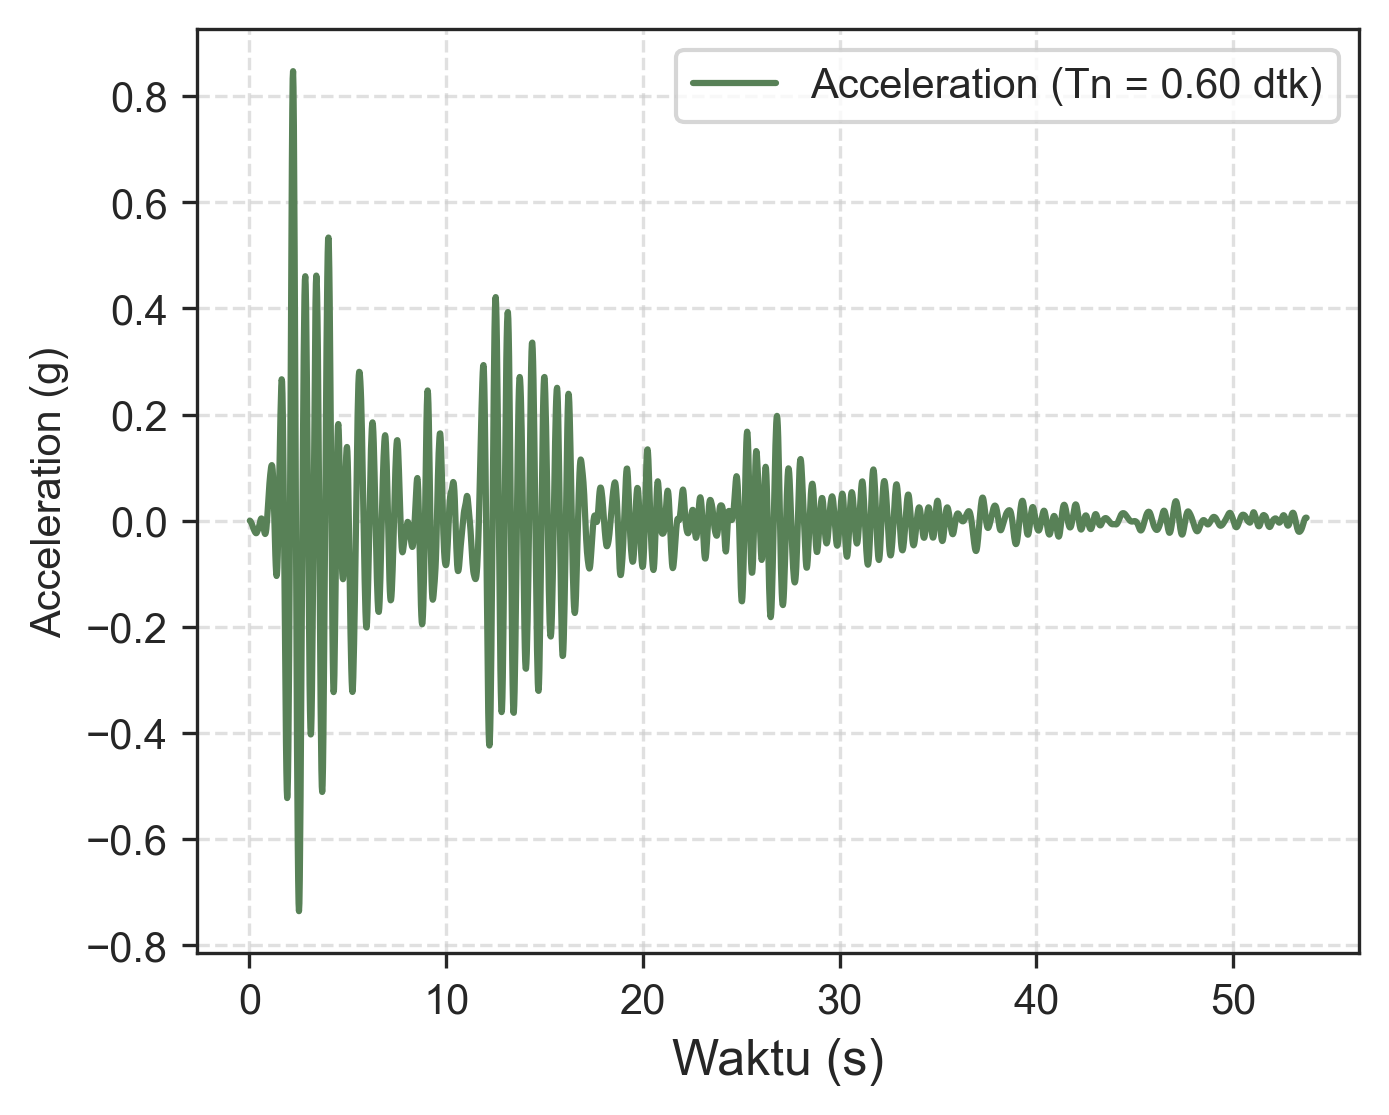

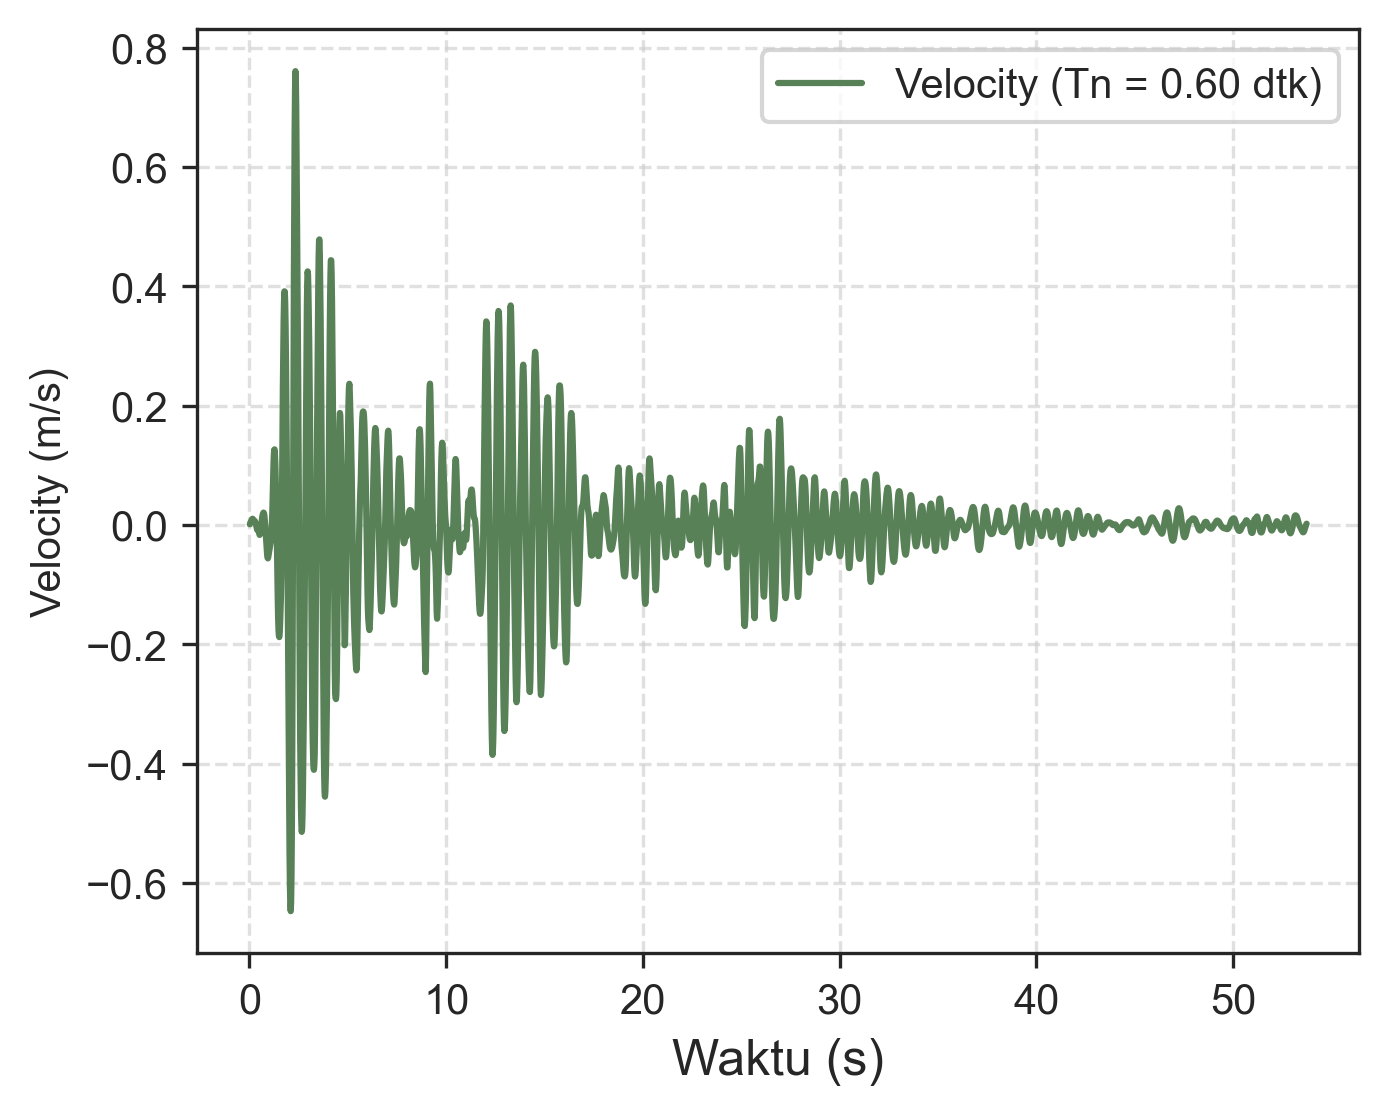

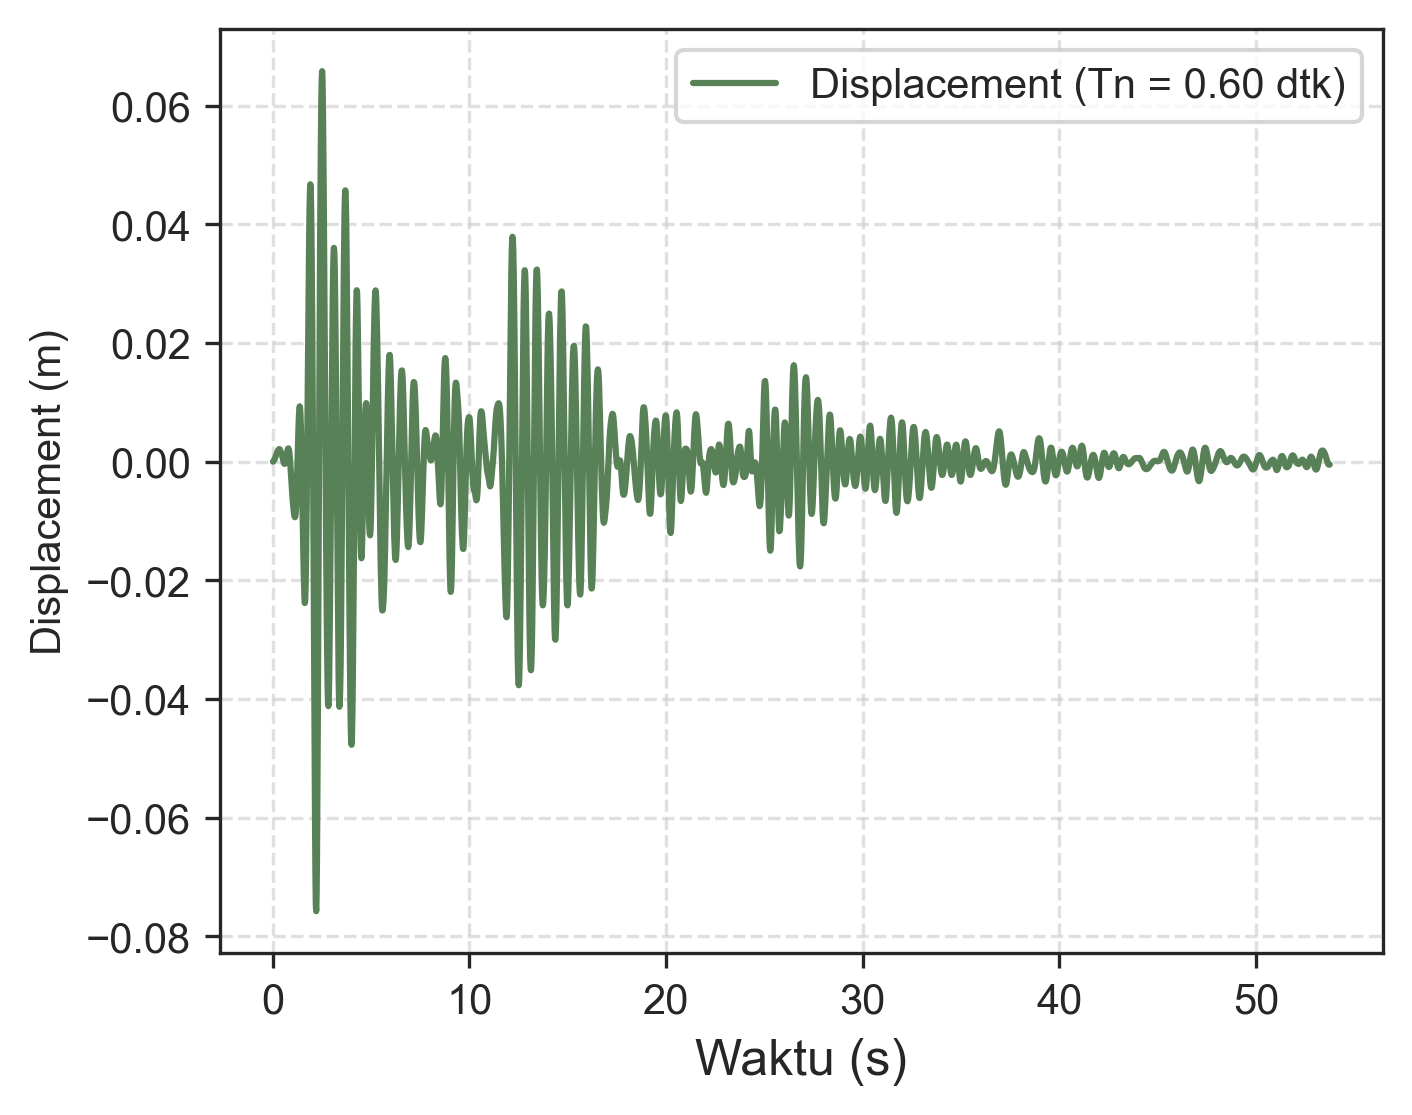

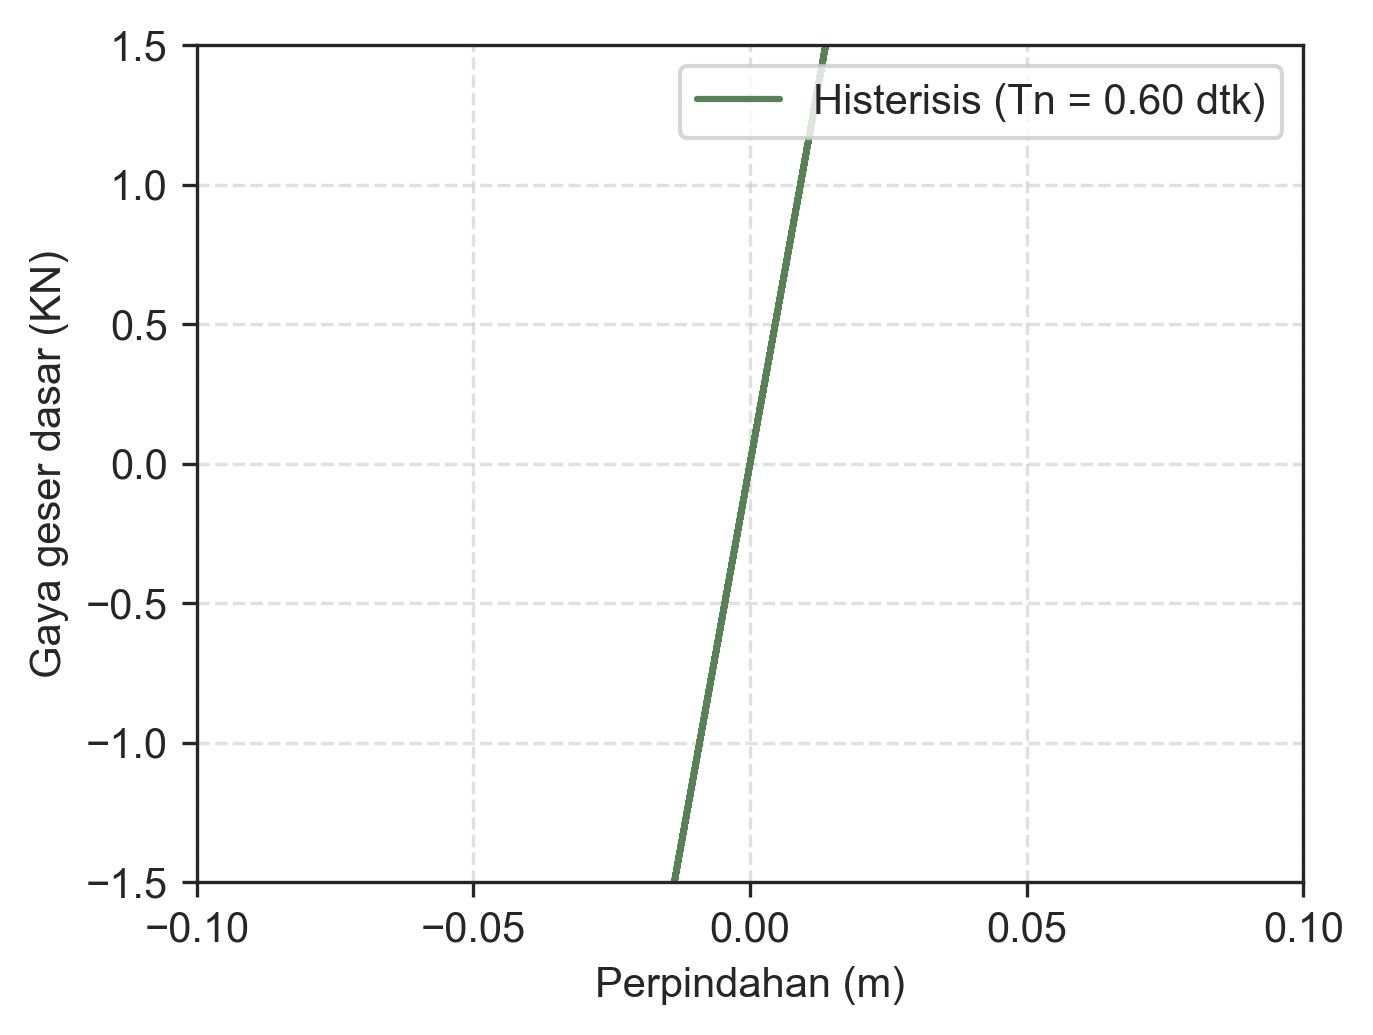

In [8]:
import openseespy.opensees as ops
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

gmrs_SF = 1
g = 9.81
damping_ratio = 0.05

# Path to ground motion record
gmrs_folderpath = r'D:\_Publication\2025_Analisis respons spektrum\code\GMR\EL_Centro_NS.csv'
GMRS = pd.read_csv(gmrs_folderpath, 
                   sep=',',
                   header=None,
                   skiprows=1)

GMRS_acc = (GMRS.iloc[:, 1] * gmrs_SF).tolist()

dt = abs(GMRS.iloc[1, 0] - GMRS.iloc[0, 0])
nPts = len(GMRS)

Acc = []

# OpenSees Model
ops.wipe()
ops.model('Basic', '-ndm', 1, '-ndf', 1)

# Calculate stiffness (Ke) and mass (Mass)
Tn = 0.6               # seconds
Mass = 1               # Tons (so force can be intepreted as kN)
omega = 2* np.pi/Tn     # rad/s (angular frequency)

Ke = Mass * omega**2   # kN/m
dy = 0.01              # arbitrary value (m)
fy = Ke * dy           # kN

# Nodes and elements
ops.node(1, 0)
ops.node(2, 0)
ops.fix(1, 1)  # Fixed base node
ops.mass(2, Mass)  # Mass at the top node

# Material definition with hardening
matTag = 1
E = fy / dy  # Initial elastic stiffness

ops.uniaxialMaterial('Elastic', 1, Ke)
ops.element('zeroLength', 1, 1, 2, "-mat", 1, "-dir", 1, '-doRayleigh', 1)

# Ground motion record
ops.timeSeries('Path', 2, '-values', *GMRS_acc, '-dt', dt, '-factor', g)
ops.pattern('UniformExcitation', 1, 1, '-accel', 2)

# Damping
betaKcomm = 2.0 * damping_ratio / omega
ops.rayleigh(0.0, 0.0, 0.0, betaKcomm)

# Analysis settings
ops.wipeAnalysis()
ops.system('BandGeneral')
ops.constraints('Plain')
ops.test('NormDispIncr', 1.0e-12, 100, 0)
ops.algorithm('Newton')
ops.numberer('RCM')
ops.integrator('Newmark', 0.5, 0.25)
ops.analysis('Transient')

# Corrected t_final based on the last value of the time series
t_final = GMRS.iloc[-1, 0]

t_current = ops.getTime()
time = []
u1 = []
u1v = []
u1a = []
baseShear = []

# Run analysis
while t_current < t_final:
    if ops.analyze(1, dt) != 0:
        ops.test('NormDispIncr', 1.0e-12, 100, 0)
        ops.algorithm('ModifiedNewton', '-initial')
        if ops.analyze(1, dt) != 0:
            ops.test('NormDispIncr', 1.0e-12, 10)
            ops.algorithm('Newton')

    t_current = ops.getTime()
    time.append(t_current)
    u1.append(ops.nodeDisp(2, 1))
    u1v.append(ops.nodeVel(2, 1))
    u1a.append(ops.nodeAccel(2, 1))   
     
    ops.reactions()
    shear = ops.nodeReaction(1, 1) 
    baseShear.append(shear)

# Convert lists to numpy arrays
Disp = np.array(u1)
Velo = np.array(u1v)
# Acc = np.array(u1a) / g
Acc = Disp * (omega**2) / g *-1

Base_Shear = np.array(baseShear)

# Check
print(f"PGA: {abs(Acc).max()} g")
print("Ke:",Ke)
print("fy:",fy)
print("T:",2 * np.pi / omega)
print("Structure period:", 2*np.pi*np.sqrt(Mass/Ke))

# Create the 'output' directory 
output_directory = 'output'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
    
output_data = np.column_stack((time, Acc, Velo, Disp))
df = pd.DataFrame(output_data, columns=['Time', 'Acceleration', 'Velocity', 'Displacement'])
output_file = os.path.join(output_directory, 'elastic_response_openseespy.csv')
df.to_csv(output_file, index=False, float_format='%.6f')


# Plotting response spectrum
sns.set_style("ticks") # other styles: 'darkgrid', 'ticks', 'dark', 'white'

# Plotting the acceleration response
plt.figure(figsize=(5, 4), dpi=300)
plt.plot(time, Acc, label=f'Acceleration (Tn = {Tn:.2f} dtk)', linestyle='-', linewidth=1.5, color="#588157")
plt.xlabel('Waktu (s)', fontsize=12)
plt.ylabel('Acceleration (g)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# Plotting the velocity response
plt.figure(figsize=(5, 4), dpi=300)
plt.plot(time, Velo, label=f'Velocity (Tn = {Tn:.2f} dtk)', linestyle='-', linewidth=1.5, color="#588157")
plt.xlabel('Waktu (s)', fontsize=12)
plt.ylabel('Velocity (m/s)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# Plotting the displacement response
plt.figure(figsize=(5, 4), dpi=300)
plt.plot(time, Disp, label=f'Displacement (Tn = {Tn:.2f} dtk)', linestyle='-', linewidth=1.5, color="#588157")
plt.xlabel('Waktu (s)', fontsize=12)
plt.ylabel('Displacement (m)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# Plotting displacement vs base shear
plt.figure(figsize=(4.5, 3.5), dpi=300)
plt.plot(Disp * -1, Base_Shear, label=f'Histerisis (Tn = {Tn:.2f} dtk)', linestyle='-', linewidth=1.5, color="#588157")
plt.xlabel('Perpindahan (m)')
plt.ylabel('Gaya geser dasar (KN)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper right', fontsize=10)

# Control axis limits and intervals
plt.tight_layout()
x_min, x_max = -0.1, 0.1  
y_min, y_max = -1.5, 1.5  
x_interval = 0.05       
y_interval = 0.5     
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(np.arange(x_min, x_max + x_interval, x_interval), fontsize=10, fontname='Arial')
plt.yticks(np.arange(y_min, y_max + y_interval, y_interval), fontsize=10, fontname='Arial')    
    
# Set the interval for the x and y axis labels
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.05))  
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.5)) 
# plt.tight_layout()
plt.show()


### PART C. INELASTIC RESPONSE SPECTRUM (OPENSEES)

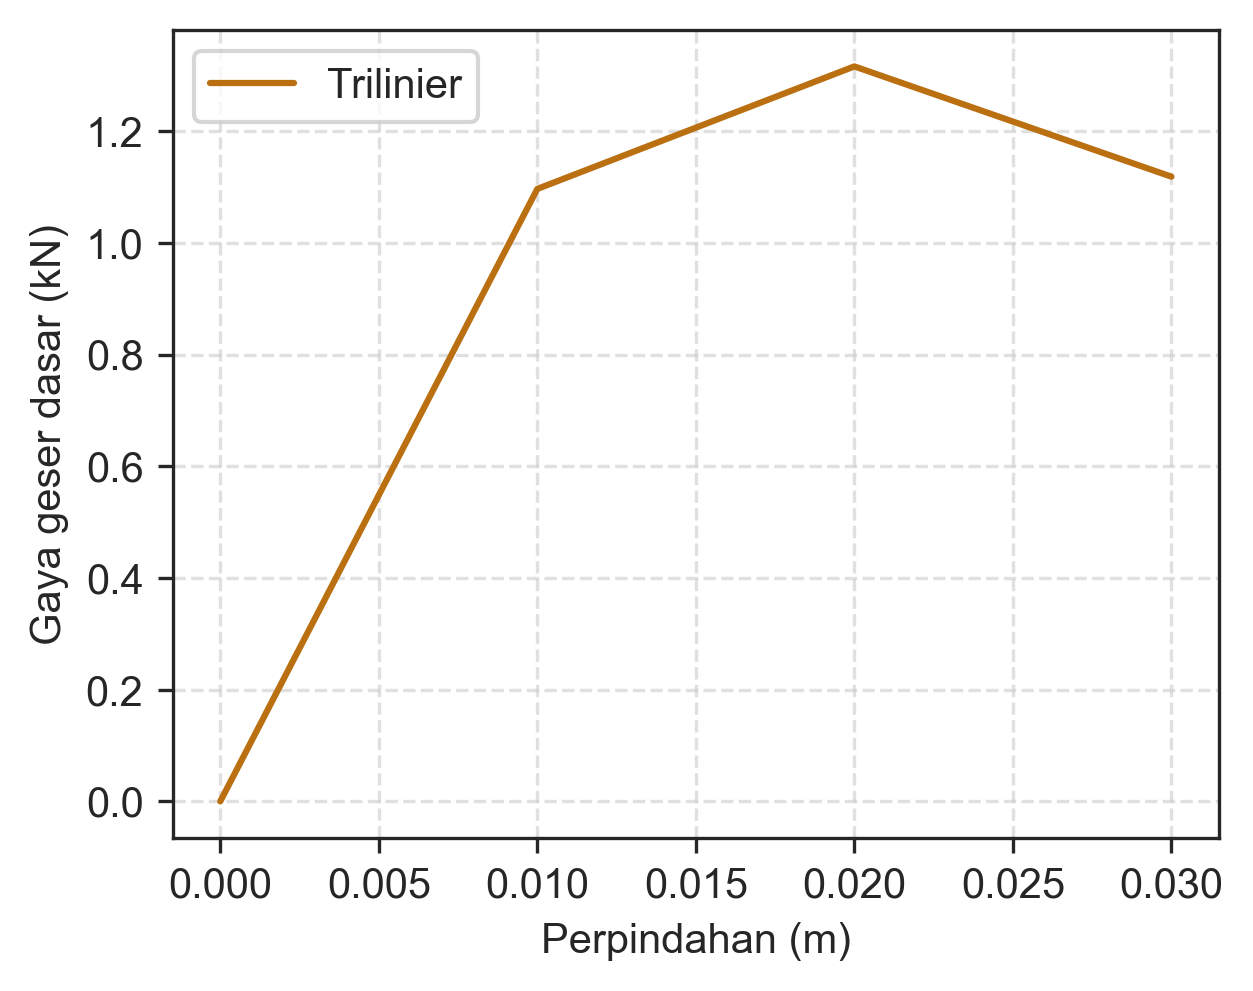

Structure period: 0.6


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Parameters
g = 9.81  # Gravity constant (m/s^2)
damping_ratio = 0.05
Epos = 0.2  # post-yield stiffness ratio
Eneg = 0.85 # # post-ultimate stiffness ratio

# Calculate stiffness (Ke) and mass (Mass)
Tn = 0.6             # seconds
Mass = 1               # Tons (so force can be intepreted as kN)
omega = 2* np.pi/Tn    # rad/s (angular frequency)

Ke = Mass * omega**2   # kN/m

dy = 0.01              # arbitrary value (m)
fy = Ke * dy           # kN


# Post-Yield Point (Point 1)
dp1 = dy * 2 # arbitrary value (m)
fp1 = fy + (Epos * Ke * (dp1 - dy)) 

# Post-Ultimate Point (Point 2)
fp2 = fp1*Eneg
dp2 = 0.03

# Capacity curve points for EPP model
f_cap = [0, fy, fp1, fp2]
d_cap = [0, dy, dp1, dp2]

# Plotting response spectrum
sns.set_style("ticks")

# Plotting displacement vs base shear
plt.figure(figsize=(4.5, 3.5), dpi=300)
plt.plot(d_cap, f_cap, label='Trilinier', linestyle='-', linewidth=1.5, color="#ba6f10")
plt.xlabel('Perpindahan (m)')
plt.ylabel('Gaya geser dasar (kN)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

print("Structure period:", 2*np.pi*np.sqrt(Mass/Ke))

after: 10 iterations  current Norm: 0.000221175 (max: 1e-10, Norm deltaR: 0.177469)
after: 10 iterations  current Norm: 0.000291089 (max: 1e-10, Norm deltaR: 0.19372)
after: 10 iterations  current Norm: 0.000290881 (max: 1e-10, Norm deltaR: 0.193847)
after: 10 iterations  current Norm: 0.000290879 (max: 1e-10, Norm deltaR: 0.193848)
after: 10 iterations  current Norm: 0.000290879 (max: 1e-10, Norm deltaR: 0.193848)
after: 10 iterations  current Norm: 0.000290879 (max: 1e-10, Norm deltaR: 0.193848)
after: 10 iterations  current Norm: 0.000290879 (max: 1e-10, Norm deltaR: 0.193848)
after: 10 iterations  current Norm: 0.000290879 (max: 1e-10, Norm deltaR: 0.193848)
after: 10 iterations  current Norm: 0.000290879 (max: 1e-10, Norm deltaR: 0.193848)
after: 10 iterations  current Norm: 0.000290879 (max: 1e-10, Norm deltaR: 0.193848)
after: 10 iterations  current Norm: 0.000290879 (max: 1e-10, Norm deltaR: 0.193848)
after: 10 iterations  current Norm: 0.000290879 (max: 1e-10, Norm deltaR: 0.1

Failed to converge at period 0.21000000000000002 seconds
Highest Sa: 1.7751719679391438 g


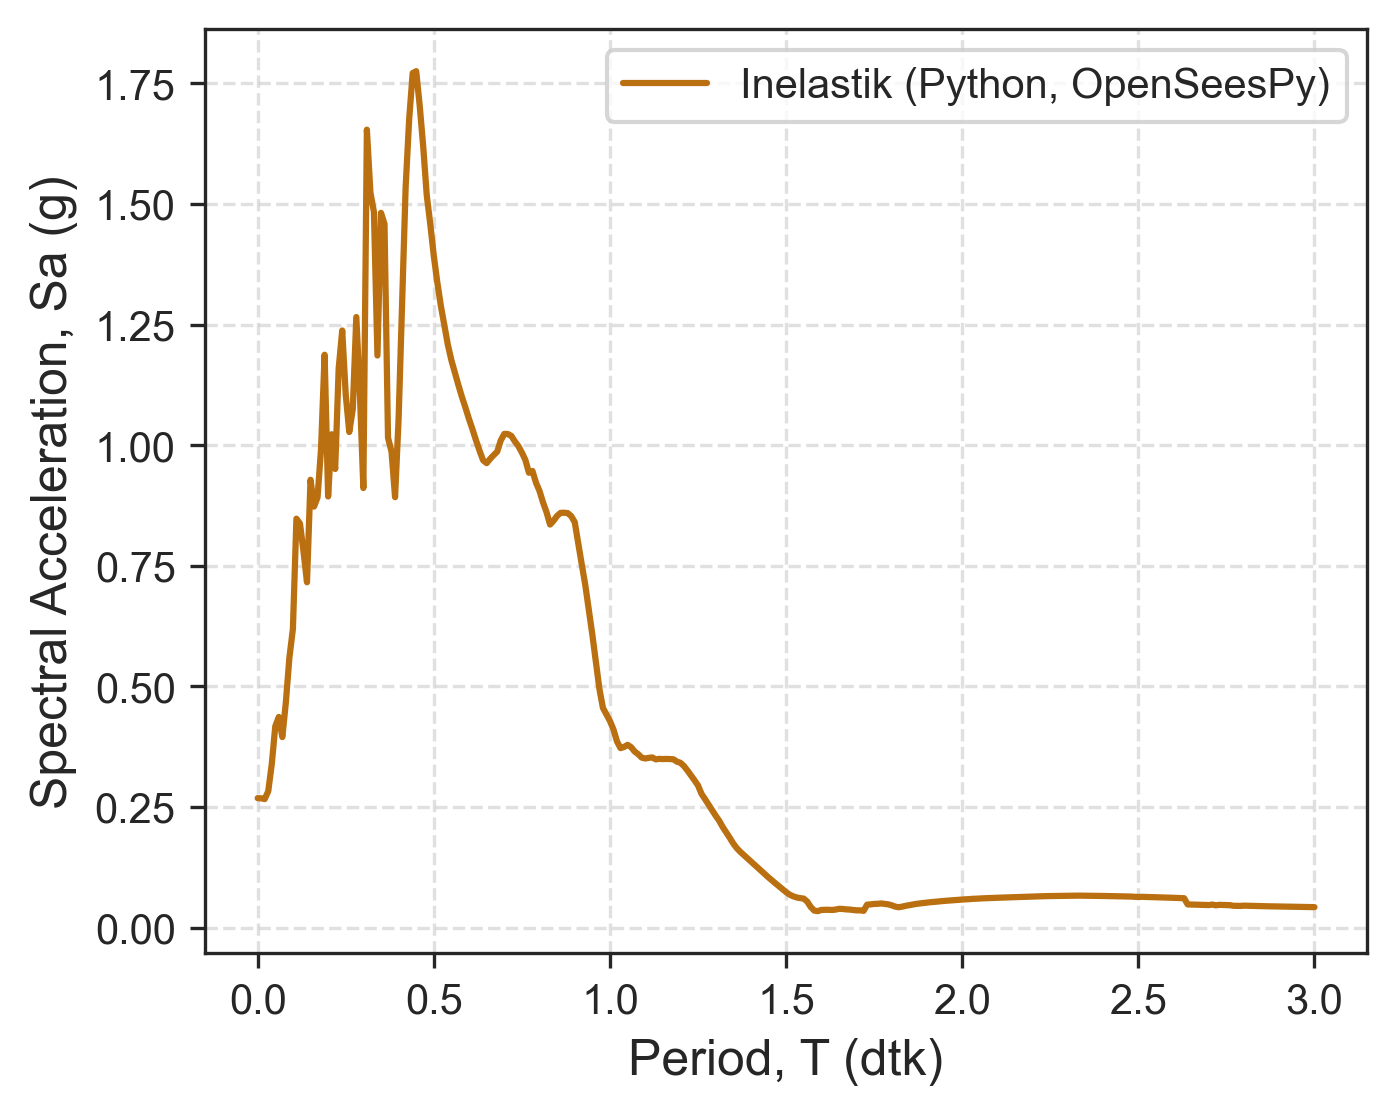

Execution time: 4.174632787704468 seconds


In [11]:
import openseespy.opensees as ops
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
import os

start_time = time.time()  # Start the timer

Tinit = 0.000001
Tmax = 3
Tstep = 0.01
Tn_ie = np.arange(Tstep, Tmax + Tstep, Tstep)
Tn_ie = np.insert(Tn_ie, 0, Tinit) 

gmrs_SF = 1  # Ground motion scale factor

# Capacity curve points for EPP model
f_cap = [0, fy, fp1, fp2]
d_cap = [0, dy, dp1, dp2]

# Path to ground motion record
gmrs_folderpath = r'D:\_Publication\2025_Analisis respons spektrum\code\GMR\EL_Centro_NS.csv'
GMRS = pd.read_csv(gmrs_folderpath, 
                   sep=',',
                   header=None,
                   skiprows=1)

GMRS_acc_ie = (GMRS.iloc[:, 1] * gmrs_SF).tolist() 
dt = abs(GMRS.iloc[1, 0] - GMRS.iloc[0, 0])
nPts = len(GMRS)

Acc_ie = []
ops.wipe()

for T in Tn_ie:
    # OpenSees Model
    ops.wipe()
    ops.model('Basic', '-ndm', 1, '-ndf', 1)

    # Calculate stiffness (Ke) and mass (Mass)
    Ke = fy / dy
    Mass = (T**2 * Ke) / (2*np.pi)**2 # units in kN
    omega = np.sqrt(Ke / Mass)

    # Nodes and elements
    ops.node(1, 0)
    ops.node(2, 0)
    ops.fix(1, 1)  # Fixed base node
    ops.mass(2, Mass)  # Mass at the top node

    mom1p = fy  # kN
    rot1p = dy  # m
    mom2p = fp1  # kN
    rot2p = dp1 # m
    mom3p = fp2  # kN
    rot3p = dp2 # m

    # Negative direction points
    mom1n = -fy # kN
    rot1n = -dy # m
    mom2n = -fp1 # kN
    rot2n = -dp1 # m
    mom3n = -fp2 # kN
    rot3n = -dp2# m

    # Pinching factors and damage
    pinchX = 0.7  # Pinching factor for strain during reloading
    pinchY = 0.7 # Pinching factor for stress during reloading
    damage1 = 0  # Damage factor due to ductility
    damage2 = 0  # Damage factor due to energy
    beta = 0.5   # Optional: Degraded unloading stiffness based on ductility (default 0.0)

    # Material definition with hardening
    matTag = 1
    ops.uniaxialMaterial('Hysteretic', matTag, 
                     mom1p, rot1p, mom2p, rot2p, mom3p, rot3p, 
                     mom1n, rot1n, mom2n, rot2n, mom3n, rot3n, 
                     pinchX, pinchY, damage1, damage2, beta)
    ops.element('zeroLength', 1, 1, 2, "-mat", 1, "-dir", 1)

    # Ground motion record
    ops.timeSeries('Path', 2, '-values', *GMRS_acc_ie, '-dt', dt, '-factor', g)
    ops.pattern('UniformExcitation', 1, 1, '-accel', 2)

    # Damping
    betaKcomm = 2.0 * damping_ratio / omega
    ops.rayleigh(0.0, 0.0, 0.0, betaKcomm)

    # Analysis settings
    ops.wipeAnalysis()
    ops.system('BandGeneral')
    ops.constraints('Plain')
    ops.test('NormDispIncr', 1.0e-10, 100, 0)
    ops.algorithm('BFGS')
    ops.numberer('RCM')
    
    ops.integrator('TRBDF2')
    # alpha = 1
    # gamma = 1.5-alpha 
    # beta = (2 - alpha)**2/4
    # ops.integrator('HHT', alpha, gamma, beta)
 
    ops.analysis('Transient') 

    ok = 0
    u1 = []

    # Loop through time steps
    while ok == 0 and ops.getTime() < dt * nPts:
        ok = ops.analyze(1, dt)
        if ok != 0:
            ops.test('NormDispIncr', 1.0e-12, 100, 0)
            ops.algorithm('ModifiedNewton', '-initial')
            ok = ops.analyze(1, dt)

            if ok == 0:
                ops.test('NormDispIncr', 1.0e-12, 10)
                ops.algorithm('Newton')

        # Report failure at each period
        if ok != 0:
            print(f"Failed to converge at period {T} seconds")
        
        u1.append(ops.nodeDisp(2, 1))

    # Store results
    Acc_ie.append(max(u1) * (omega**2) / g)
    
Acc_ie = np.array(Acc_ie)

# Print Peak Ground Acc_ieeleration (PGA)
print(f"Highest Sa: {abs(Acc_ie).max()} g")

# Create the 'output' directory if it doesn't exist
output_directory = 'output'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
    
output_data = np.column_stack((Tn_ie, Acc_ie))  # Stack T and Sa as columns
output_file = os.path.join(output_directory, 'rs_inelasticopenseespy.csv')  # Name of the output file
np.savetxt(output_file, output_data, delimiter=',', fmt='%.6f') # Save without header, 6 decimal places


# Plotting response spectrum
sns.set_style("ticks") # Try other styles: 'darkgrid', 'ticks', 'dark', 'white'

plt.figure(figsize=(5, 4), dpi=300)
plt.plot(Tn_ie, Acc_ie, color="#ba6f10", label='Inelastik (Python, OpenSeesPy)')
plt.xlabel('Period, T (dtk)', fontsize=12)
plt.ylabel('Spectral Acceleration, Sa (g)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
 
plt.show()

end_time = time.time()  # End the timer
duration = end_time - start_time  # Calculate duration
print(f"Execution time: {duration} seconds")


PGA: 1.0539223895232943 g
Ke: 109.6622711232151
fy: 1.0966227112321512
T: 0.6
Structure period: 0.6


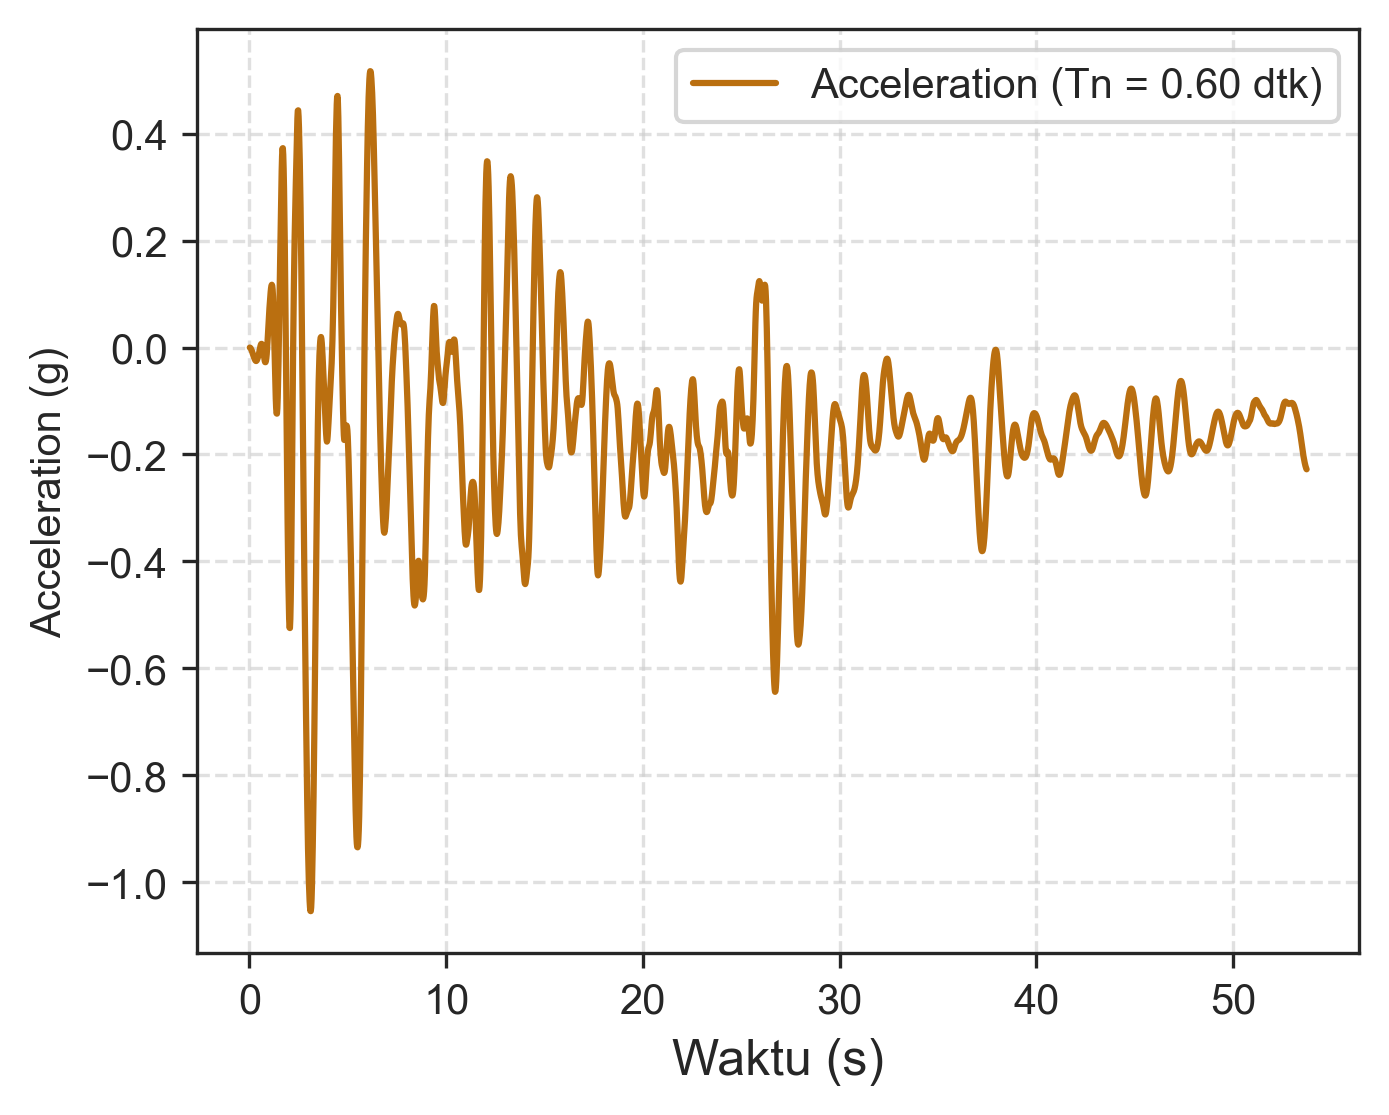

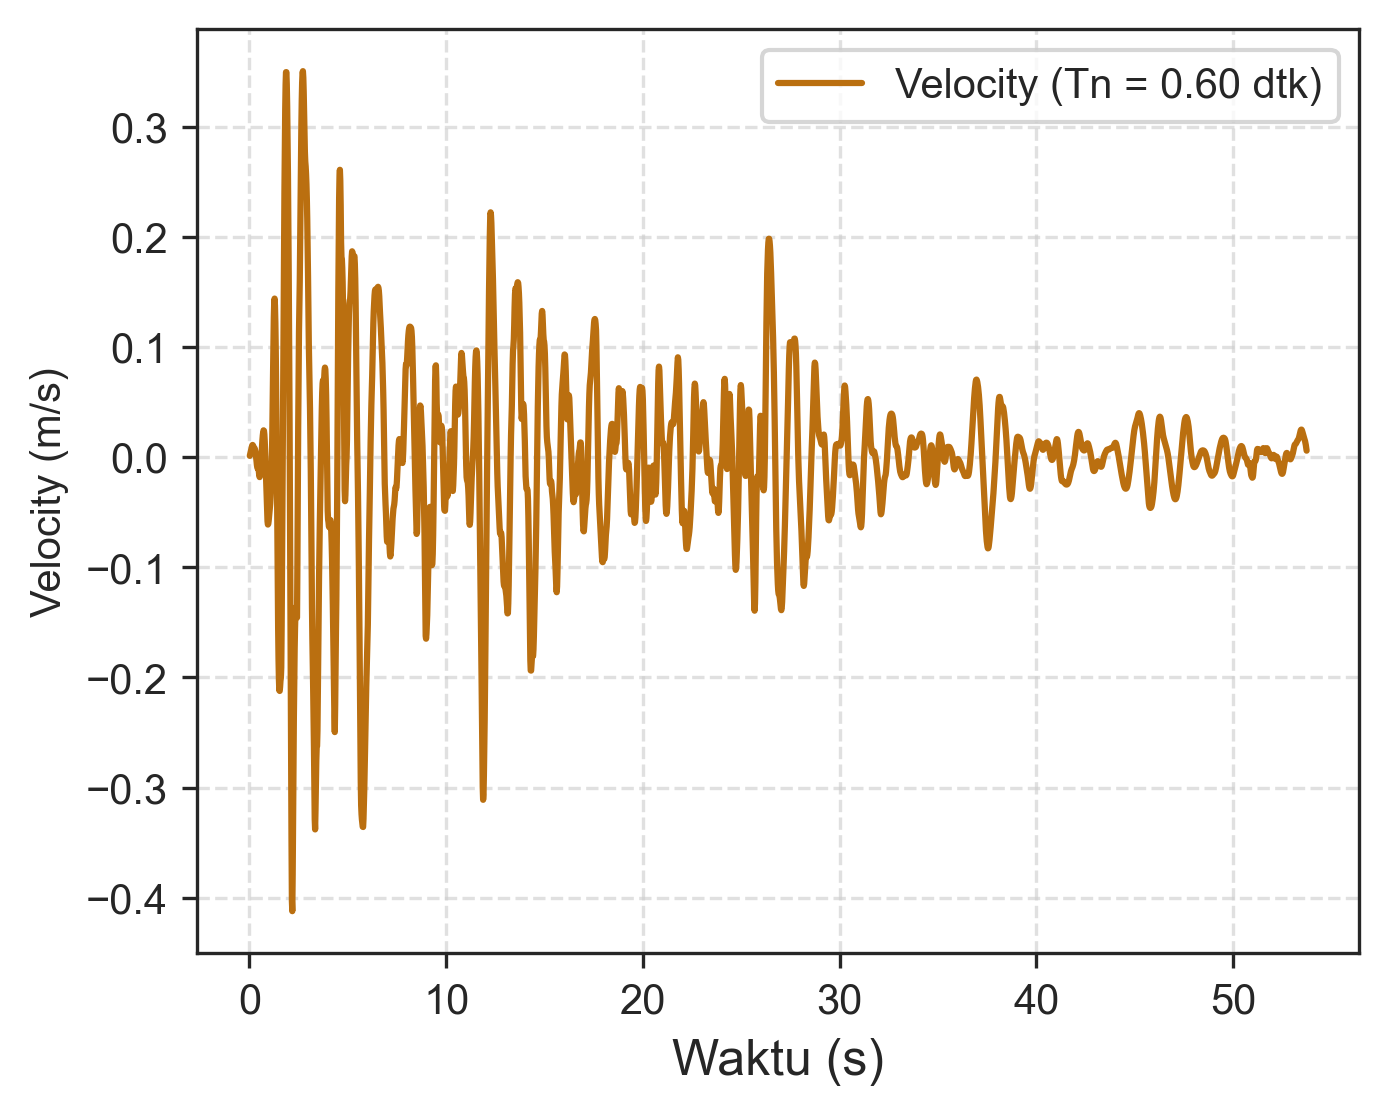

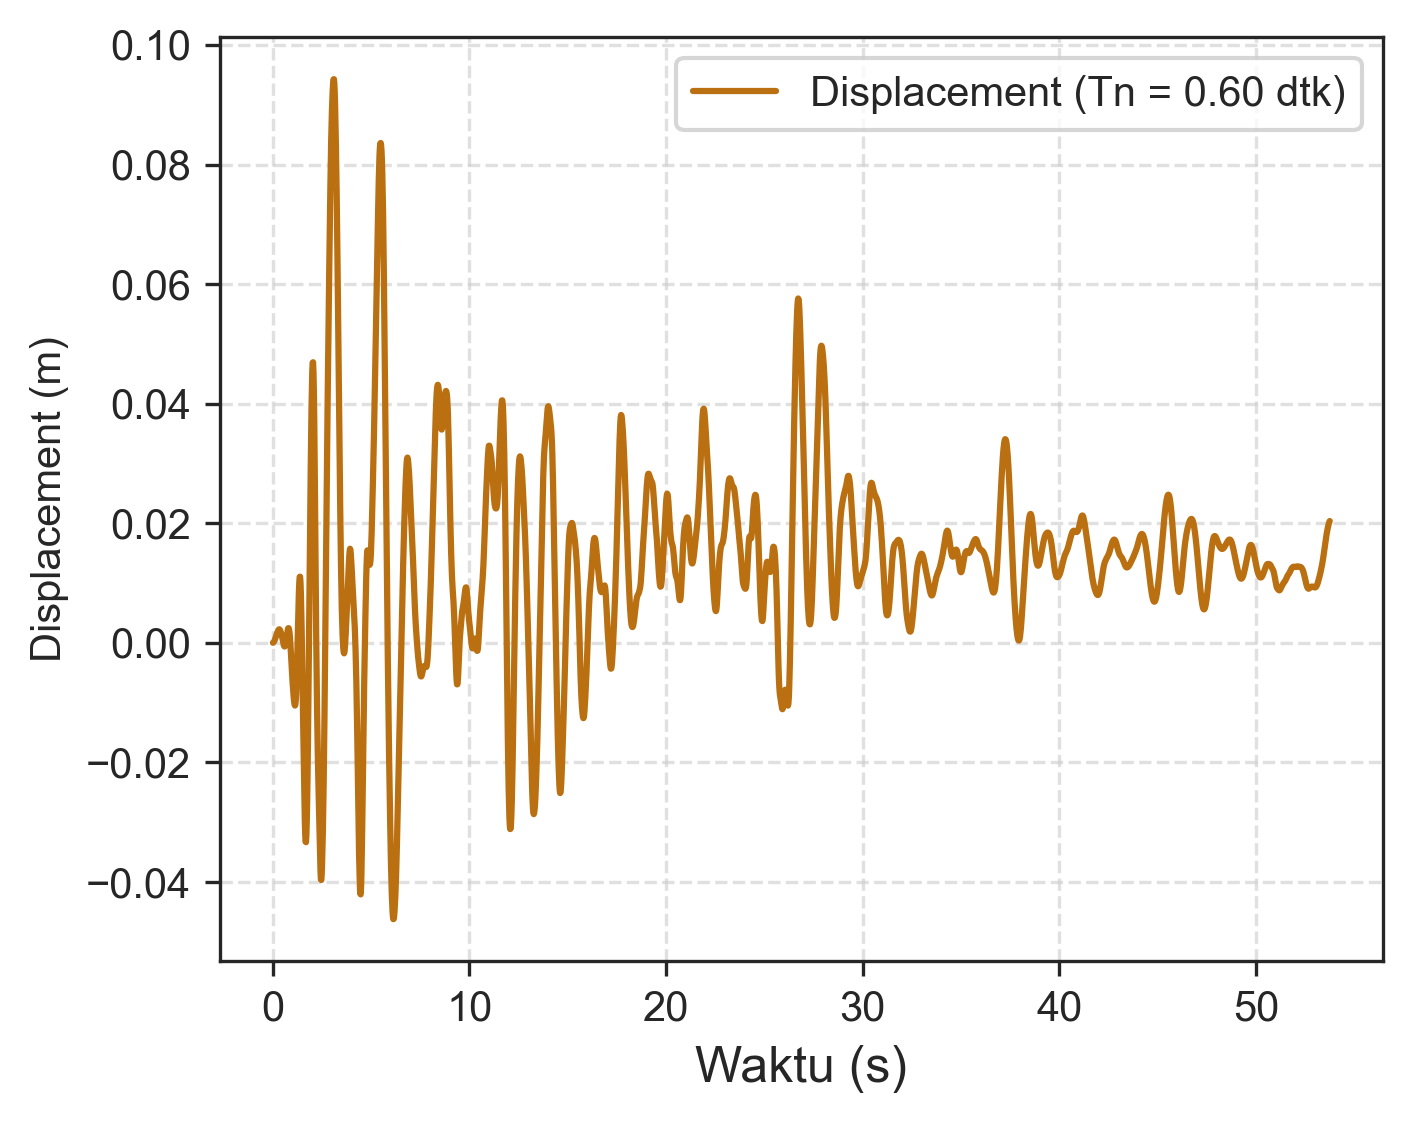

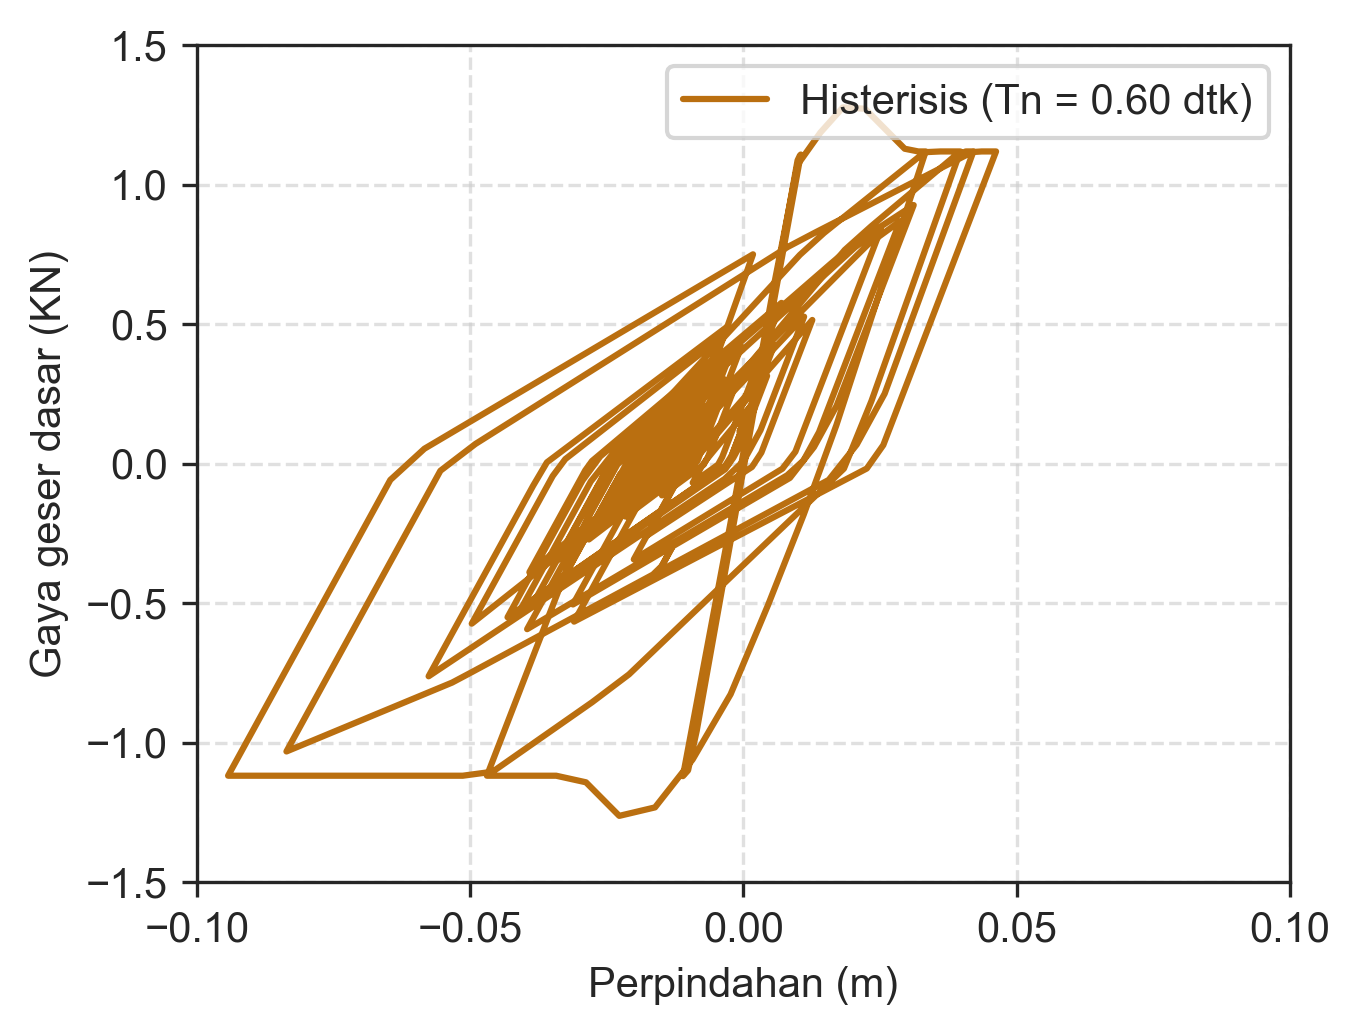

In [12]:
import openseespy.opensees as ops
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

gmrs_SF = 1
g = 9.81
damping_ratio = 0.05

# Path to ground motion record
gmrs_folderpath = r'D:\_Publication\2025_Analisis respons spektrum\code\GMR\EL_Centro_NS.csv'
GMRS = pd.read_csv(gmrs_folderpath, 
                   sep=',',
                   header=None,
                   skiprows=1)

GMRS_acc = (GMRS.iloc[:, 1] * gmrs_SF).tolist()

dt = abs(GMRS.iloc[1, 0] - GMRS.iloc[0, 0])
nPts = len(GMRS)

Acc = []

# OpenSees Model
ops.wipe()
ops.model('Basic', '-ndm', 1, '-ndf', 1)

# Calculate stiffness (Ke) and mass (Mass)
Tn = Tn                # seconds
Mass = 1               # Tons (so force can be intepreted as kN)
omega = 2* np.pi/Tn     # rad/s (angular frequency)

Ke = Mass * omega**2   # kN/m
fy = Ke * dy           # kN

# Nodes and elements
ops.node(1, 0)
ops.node(2, 0)
ops.fix(1, 1)  # Fixed base node
ops.mass(2, Mass)  # Mass at the top node

# Material definition with hardening
matTag = 1
E = fy / dy  # Initial elastic stiffness



# Material definition with hysteretic hardening
ops.uniaxialMaterial('Hysteretic', matTag, 
                     mom1p, rot1p, mom2p, rot2p, mom3p, rot3p, 
                     mom1n, rot1n, mom2n, rot2n, mom3n, rot3n, 
                     pinchX, pinchY, damage1, damage2, beta)


ops.element('zeroLength', 1, 1, 2, "-mat", 1, "-dir", 1)

# Ground motion record
ops.timeSeries('Path', 2, '-values', *GMRS_acc, '-dt', dt, '-factor', g)
ops.pattern('UniformExcitation', 1, 1, '-accel', 2)

# Damping
betaKcomm = 2.0 * damping_ratio / omega
ops.rayleigh(0.0, 0.0, 0.0, betaKcomm)

# Analysis settings
ops.wipeAnalysis()
ops.system('BandGeneral')
ops.constraints('Plain')
ops.test('NormDispIncr', 1.0e-10, 100, 0)
ops.algorithm('BFGS')
ops.numberer('RCM')

ops.integrator('TRBDF2')
# alpha = 1
# gamma = 1.5-alpha 
# beta = (2 - alpha)**2/4
# ops.integrator('HHT', alpha, gamma, beta)

ops.analysis('Transient') 

# Corrected t_final based on the last value of the time series
t_final = GMRS.iloc[-1, 0]

t_current = ops.getTime()
time = []
u1 = []
u1v = []
u1a = []
baseShear = []

# Run analysis
while t_current < t_final:
    if ops.analyze(1, dt) != 0:
        ops.test('NormDispIncr', 1.0e-12, 100, 0)
        ops.algorithm('ModifiedNewton', '-initial')
        if ops.analyze(1, dt) != 0:
            ops.test('NormDispIncr', 1.0e-12, 10)
            ops.algorithm('Newton')

    t_current = ops.getTime()
    time.append(t_current)
    u1.append(ops.nodeDisp(2, 1))
    u1v.append(ops.nodeVel(2, 1))
    u1a.append(ops.nodeAccel(2, 1))   
     
    ops.reactions()
    shear = ops.nodeReaction(1, 1)  
    baseShear.append(shear)

# Convert lists to numpy arrays
Disp = np.array(u1)
Velo = np.array(u1v)
# Acc = np.array(u1a) / g
Acc = Disp * (omega**2) / g *-1

Base_Shear = np.array(baseShear)

# Check
print(f"PGA: {abs(Acc).max()} g")
print("Ke:",Ke)
print("fy:",fy)
print("T:",2 * np.pi / omega)
print("Structure period:", 2*np.pi*np.sqrt(Mass/Ke))

# Create the 'output' directory 
output_directory = 'output'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
    
output_data = np.column_stack((time, Acc, Velo, Disp))
df = pd.DataFrame(output_data, columns=['Time', 'Acceleration', 'Velocity', 'Displacement'])
output_file = os.path.join(output_directory, 'inelastic_response_openseespy.csv')
df.to_csv(output_file, index=False, float_format='%.6f')

# Plotting response spectrum
sns.set_style("ticks") # other styles: 'darkgrid', 'ticks', 'dark', 'white'

# Plotting the acceleration response
plt.figure(figsize=(5, 4), dpi=300)
plt.plot(time, Acc, label=f'Acceleration (Tn = {Tn:.2f} dtk)', linestyle='-', linewidth=1.5, color="#ba6f10")
plt.xlabel('Waktu (s)', fontsize=12)
plt.ylabel('Acceleration (g)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# Plotting the velocity response
plt.figure(figsize=(5, 4), dpi=300)
plt.plot(time, Velo, label=f'Velocity (Tn = {Tn:.2f} dtk)', linestyle='-', linewidth=1.5, color="#ba6f10")
plt.xlabel('Waktu (s)', fontsize=12)
plt.ylabel('Velocity (m/s)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# Plotting the displacement response
plt.figure(figsize=(5, 4), dpi=300)
plt.plot(time, Disp, label=f'Displacement (Tn = {Tn:.2f} dtk)', linestyle='-', linewidth=1.5, color="#ba6f10")
plt.xlabel('Waktu (s)', fontsize=12)
plt.ylabel('Displacement (m)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# Plotting displacement vs base shear
plt.figure(figsize=(4.5, 3.5), dpi=300)
plt.plot(Disp * -1, Base_Shear, label=f'Histerisis (Tn = {Tn:.2f} dtk)', linestyle='-', linewidth=1.5, color="#ba6f10")
plt.xlabel('Perpindahan (m)')
plt.ylabel('Gaya geser dasar (KN)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper right', fontsize=10)

# Control axis limits and intervals
plt.tight_layout()
x_min, x_max = -0.1, 0.1  
y_min, y_max = -1.5, 1.5  
x_interval = 0.05       
y_interval = 0.5     
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(np.arange(x_min, x_max + x_interval, x_interval), fontsize=10, fontname='Arial')
plt.yticks(np.arange(y_min, y_max + y_interval, y_interval), fontsize=10, fontname='Arial')    
    
# Set the interval for the x and y axis labels
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.05))  
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.5)) 
# plt.tight_layout()
plt.show()


### PART D. COMPARISON STRATEGY

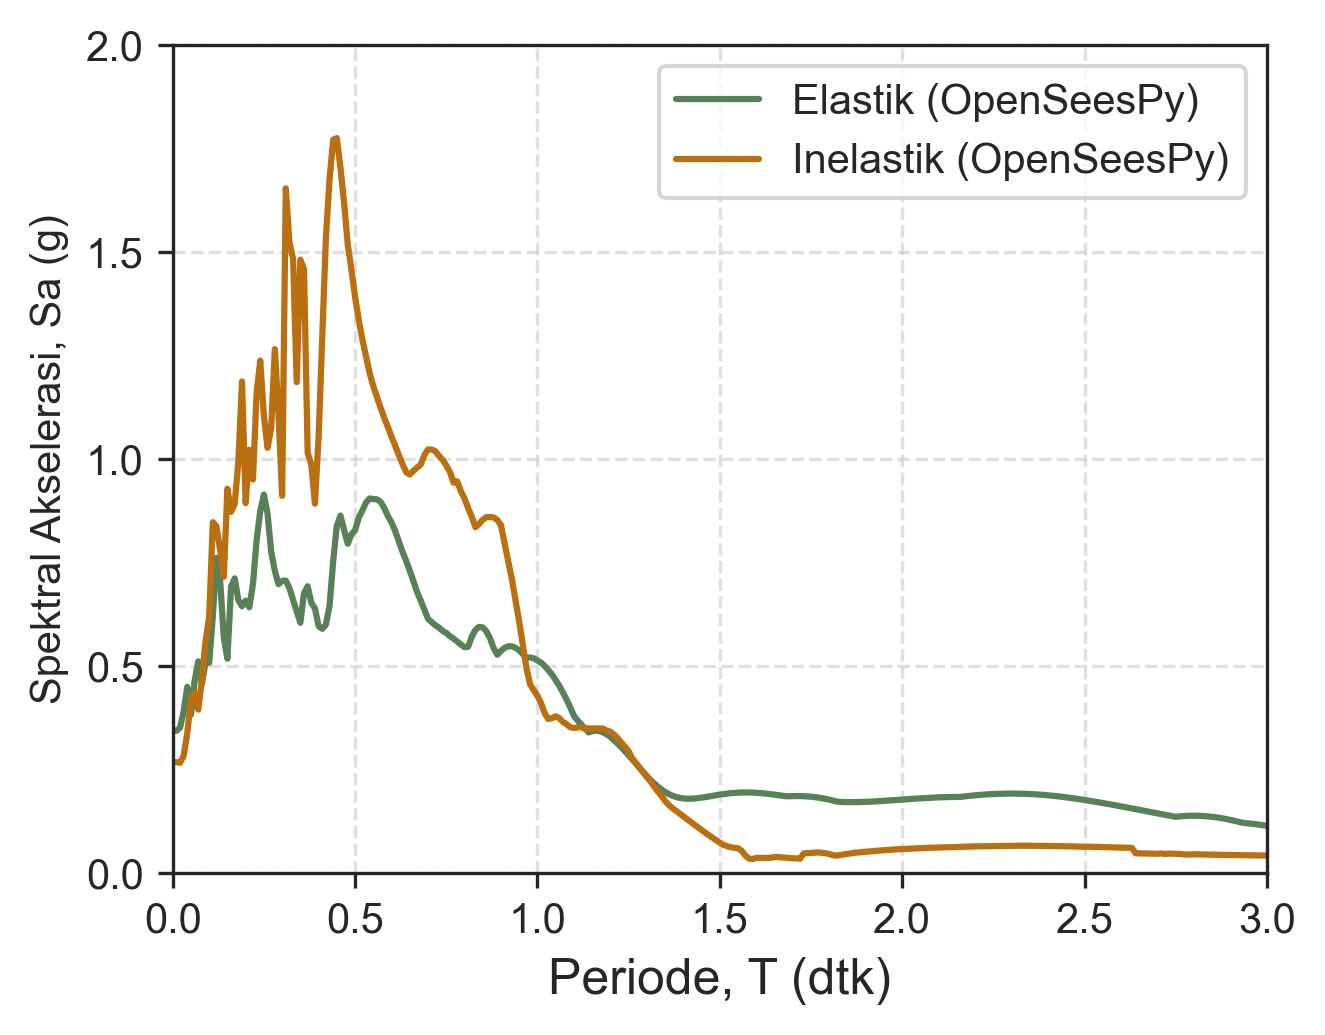

In [13]:
rs_elasticpython = pd.read_csv(r'D:\_Publication\2025_Analisis respons spektrum\code\output\rs_elasticpython.csv')
rs_elastic = pd.read_csv(r'D:\_Publication\2025_Analisis respons spektrum\code\output\rs_elasticopenseespy.csv')
rs_inelastic = pd.read_csv(r'D:\_Publication\2025_Analisis respons spektrum\code\output\rs_inelasticopenseespy.csv')

# Plotting response spectrum
sns.set_style("ticks") # Try other styles: 'darkgrid', 'ticks', 'dark', 'white'

plt.figure(figsize=(4.5, 3.5), dpi=300)
plt.plot(rs_elastic.iloc[:, 0], rs_elastic.iloc[:, 1], linestyle='-', linewidth=1.5, color="#588157", label='Elastik (OpenSeesPy)')
plt.plot(rs_inelastic.iloc[:, 0], rs_inelastic.iloc[:, 1], linestyle='-', color="#ba6f10", label='Inelastik (OpenSeesPy)')
plt.xlabel('Periode, T (dtk)', fontsize=12)
plt.ylabel('Spektral Akselerasi, Sa (g)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()


# Control axis limits and intervals
plt.tight_layout()
x_min, x_max = 0, 3  
y_min, y_max = 0, 2  
x_interval = 0.5      
y_interval = 0.5     
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(np.arange(x_min, x_max + x_interval, x_interval), fontsize=10, fontname='Arial')
plt.yticks(np.arange(y_min, y_max + y_interval, y_interval), fontsize=10, fontname='Arial')    
    
# Set the interval for the x and y axis labels
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.5))  
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.5)) 

plt.show()


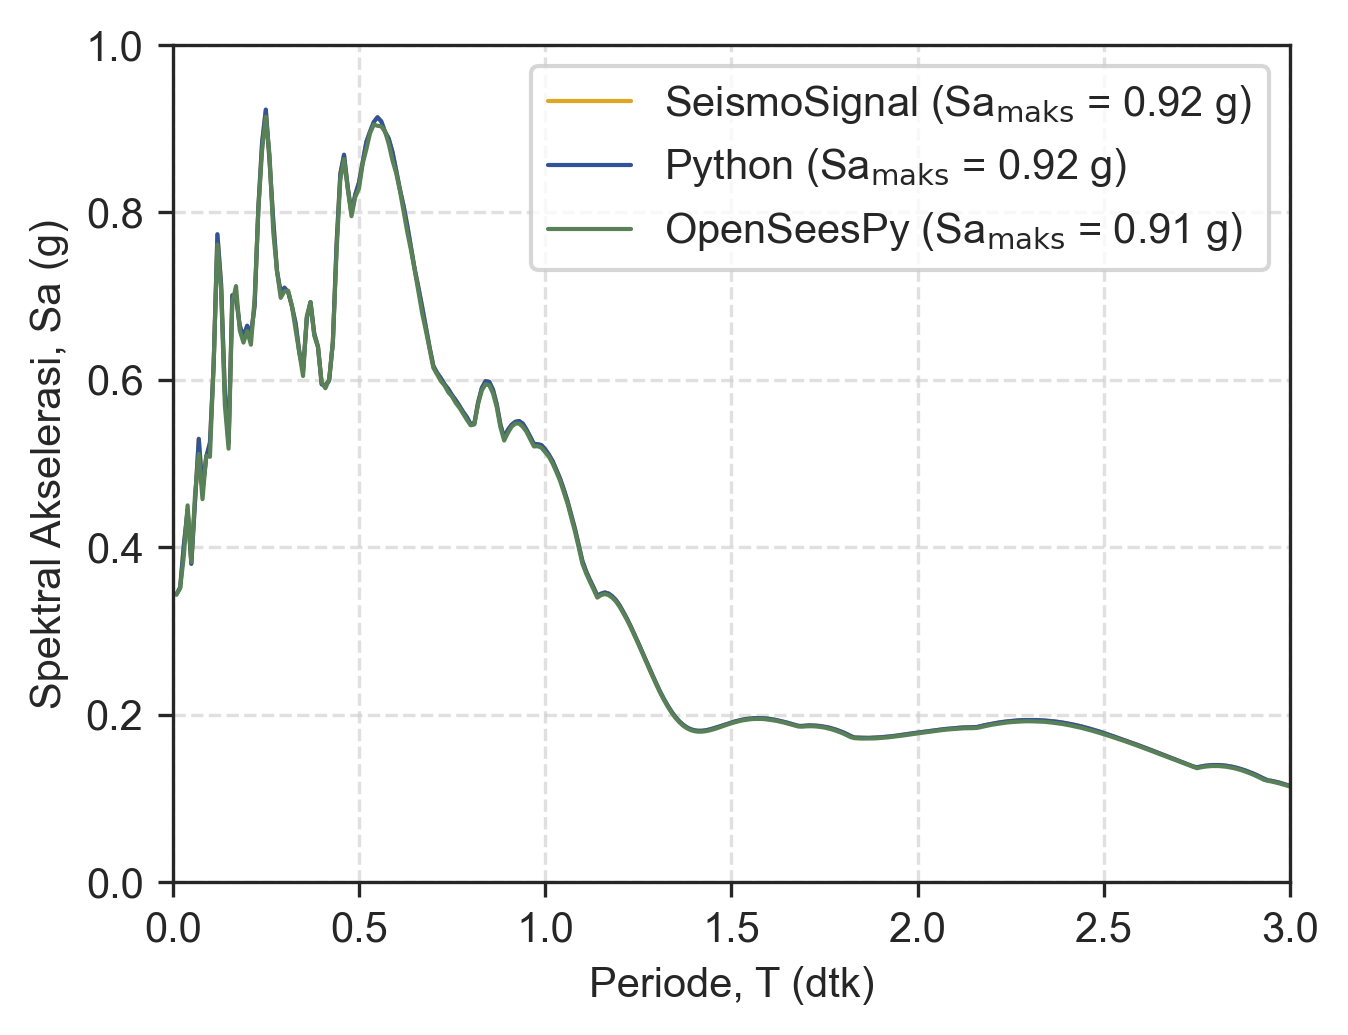

In [14]:
import pandas as pd

rs_elasticpython = pd.read_csv(r'D:\_Publication\2025_Analisis respons spektrum\code\output\rs_elasticpython.csv')
rs_openseespy = pd.read_csv(r'D:\_Publication\2025_Analisis respons spektrum\code\output\rs_elasticopenseespy.csv')
rs_seismo = pd.read_csv(r'D:\_Publication\2025_Analisis respons spektrum\code\output\rs_elasticseismo.csv')

SaM_python = rs_elasticpython.iloc[:, 1].max()
SaM_openseespy = rs_openseespy.iloc[:, 1].max()
SaM_seismo = rs_seismo.iloc[:, 1].max()

# Plotting response spectrum
sns.set_style("ticks") # Try other styles: 'darkgrid', 'ticks', 'dark', 'white'

plt.figure(figsize=(4.5, 3.5), dpi=300)
plt.plot(rs_seismo.iloc[:, 0], rs_seismo.iloc[:, 1], linestyle='-', linewidth=1, color="#e0a621", label=rf'SeismoSignal (Sa$_{{\text{{maks}}}}$ = {SaM_seismo:.2f} g)')
plt.plot(rs_elasticpython.iloc[:, 0], rs_elasticpython.iloc[:, 1], linestyle='-', linewidth=1, color="#315399", label=rf'Python (Sa$_{{\text{{maks}}}}$ = {SaM_python:.2f} g)')
plt.plot(rs_openseespy.iloc[:, 0], rs_openseespy.iloc[:, 1], linestyle='-', linewidth=1, color="#588157", label=rf'OpenSeesPy (Sa$_{{\text{{maks}}}}$ = {SaM_openseespy:.2f} g)')
plt.xlabel('Periode, T (dtk)', fontsize=10)
plt.ylabel('Spektral Akselerasi, Sa (g)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()


# Control axis limits and intervals
plt.tight_layout()
x_min, x_max = 0, 3  # Customize x-axis range
y_min, y_max = 0, 1  # Customize y-axis range
x_interval = 0.2       # Interval for x-axis ticks
y_interval = 0.2     # Interval for y-axis ticks
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(np.arange(x_min, x_max + x_interval, x_interval), fontsize=10, fontname='Arial')
plt.yticks(np.arange(y_min, y_max + y_interval, y_interval), fontsize=10, fontname='Arial')    
    
# Set the interval for the x and y axis labels
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.5))  
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.2)) 

plt.show()


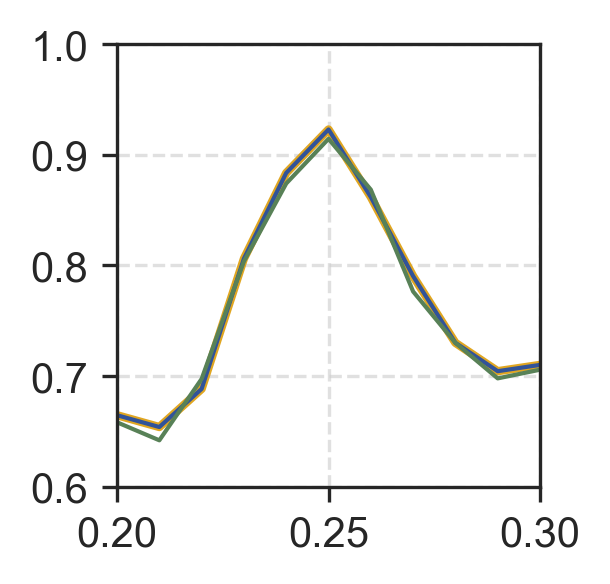

In [15]:
import pandas as pd

rs_elasticpython = pd.read_csv(r'D:\_Publication\2025_Analisis respons spektrum\code\output\rs_elasticpython.csv')
rs_openseespy = pd.read_csv(r'D:\_Publication\2025_Analisis respons spektrum\code\output\rs_elasticopenseespy.csv')
rs_seismo = pd.read_csv(r'D:\_Publication\2025_Analisis respons spektrum\code\output\rs_elasticseismo.csv')

SaM_python = rs_elasticpython.iloc[:, 1].max()
SaM_openseespy = rs_openseespy.iloc[:, 1].max()
SaM_seismo = rs_seismo.iloc[:, 1].max()

# Plotting response spectrum
sns.set_style("ticks") # Try other styles: 'darkgrid', 'ticks', 'dark', 'white'

plt.figure(figsize=(2, 2), dpi=300)
plt.plot(rs_seismo.iloc[:, 0], rs_seismo.iloc[:, 1], linestyle='-', linewidth=2, color="#e0a621", label=rf'SeismoSignal (Sa$_{{\text{{maks}}}}$ = {SaM_seismo:.2f} g)')
plt.plot(rs_elasticpython.iloc[:, 0], rs_elasticpython.iloc[:, 1], linestyle='-', linewidth=1, color="#315399", label=rf'Python (Sa$_{{\text{{maks}}}}$ = {SaM_python:.2f} g)')
plt.plot(rs_openseespy.iloc[:, 0], rs_openseespy.iloc[:, 1], linestyle='-', linewidth=1, color="#588157", label=rf'OpenSeesPy (Sa$_{{\text{{maks}}}}$ = {SaM_openseespy:.2f} g)')
# plt.xlabel('Periode, T (dtk)', fontsize=12)
# plt.ylabel('Spektral Akselerasi, Sa (g)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)


# Control axis limits and intervals
plt.tight_layout()
x_min, x_max = 0.2, 0.3  
y_min, y_max = 0.6, 1  
x_interval = 0.1       
y_interval = 0.05     
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(np.arange(x_min, x_max + x_interval, x_interval), fontsize=10, fontname='Arial')
plt.yticks(np.arange(y_min, y_max + y_interval, y_interval), fontsize=10, fontname='Arial')    
    
# Set the interval for the x and y axis labels
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.05))  
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.1)) 

plt.show()


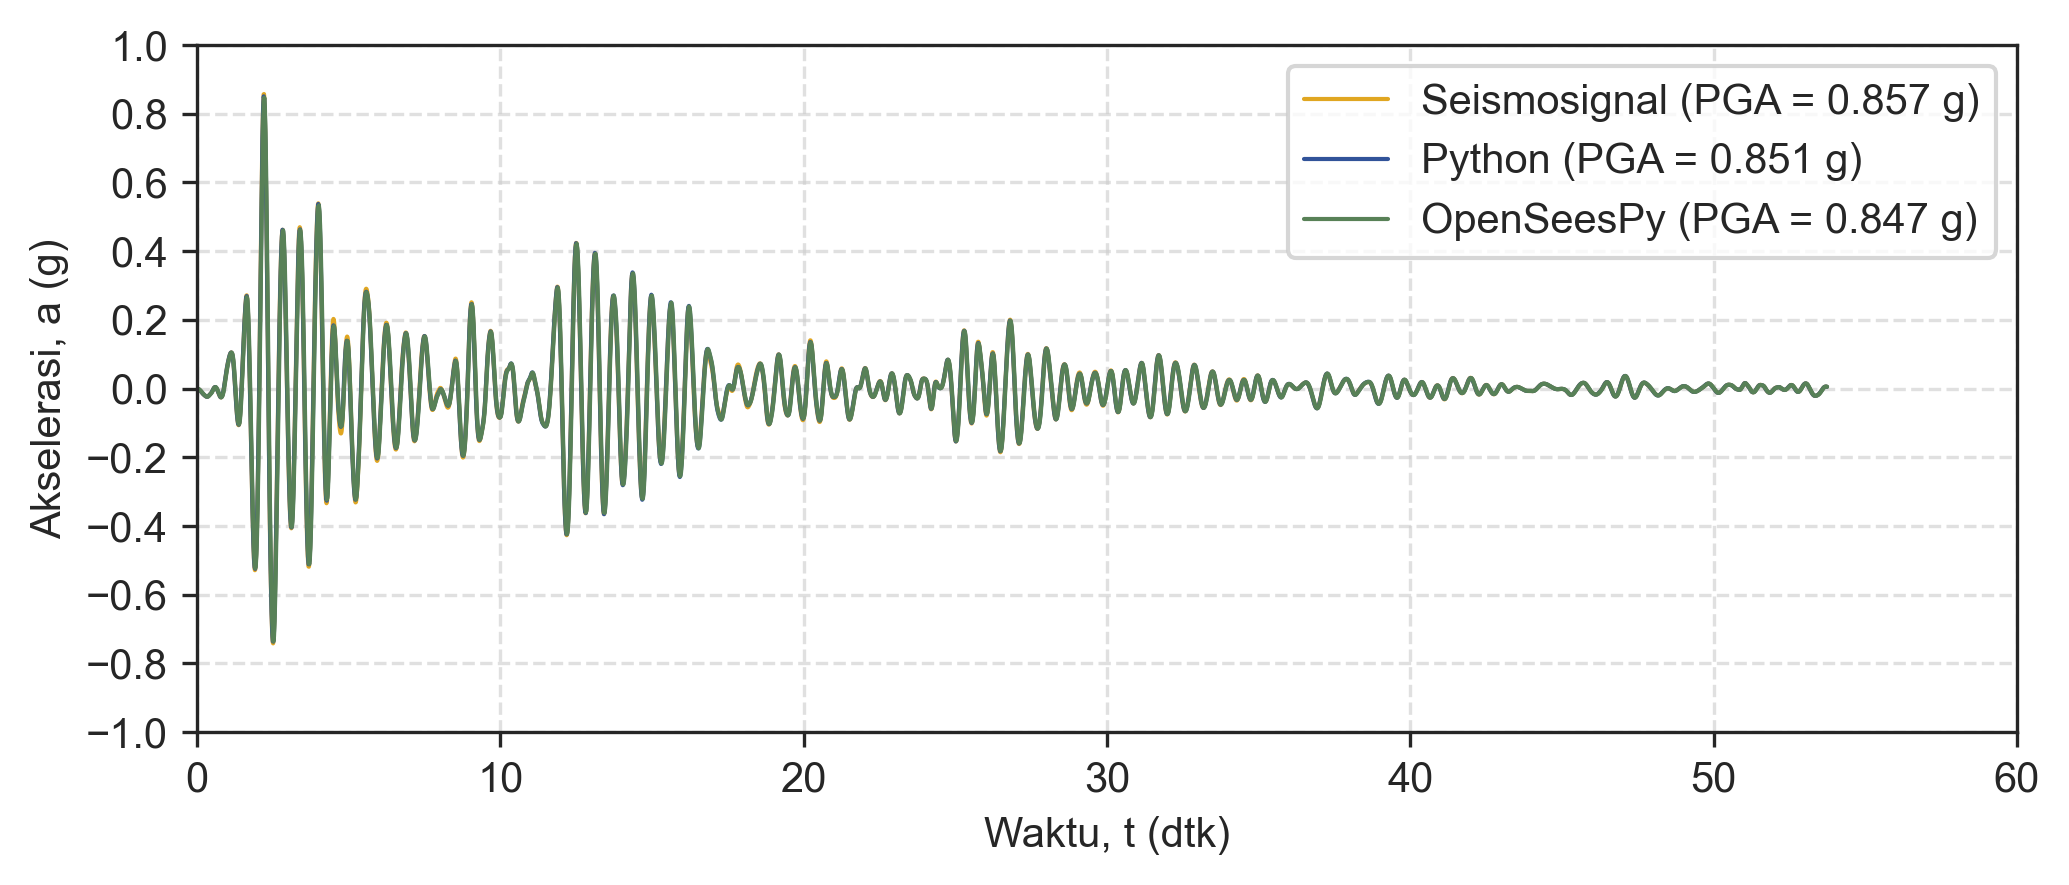

In [16]:
response_seismosignal = pd.read_csv(r'D:\_Publication\2025_Analisis respons spektrum\code\output\elastik_response_seismosignal.csv')
response_python = pd.read_csv(r'D:\_Publication\2025_Analisis respons spektrum\code\output\elastic_response_python.csv')
response_openseespy = pd.read_csv(r'D:\_Publication\2025_Analisis respons spektrum\code\output\elastic_response_openseespy.csv')

PGA_seismo = response_seismosignal[' Accel'].max()
PGA_python = response_python['Acceleration'].max()
PGA_openseespy = response_openseespy['Acceleration'].max()

# Plotting response spectrum
sns.set_style("ticks") # Try other styles: 'darkgrid', 'ticks', 'dark', 'white'

plt.figure(figsize=(7, 3), dpi=300)
plt.plot(response_seismosignal.iloc[:, 0], response_seismosignal.iloc[:, 1], linestyle='-', linewidth=1, color="#e0a621", label=f'Seismosignal (PGA = {PGA_seismo:.3f} g)')
plt.plot(response_python.iloc[:, 0], response_python.iloc[:, 1], linestyle='-', linewidth=1, color="#315399", label=f'Python (PGA = {PGA_python:.3f} g)')
plt.plot(response_openseespy.iloc[:, 0], response_openseespy.iloc[:, 1], linestyle='-', linewidth=1, color="#588157", label=f'OpenSeesPy (PGA = {PGA_openseespy:.3f} g)')
plt.xlabel('Waktu, t (dtk)', fontsize=10)
plt.ylabel('Akselerasi, a (g)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Control axis limits and intervals
plt.tight_layout()
x_min, x_max = 0, 60  
y_min, y_max = -1, 1  
x_interval = 10       
y_interval = 0.2     
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(np.arange(x_min, x_max + x_interval, x_interval), fontsize=10, fontname='Arial')
plt.yticks(np.arange(y_min, y_max + y_interval, y_interval), fontsize=10, fontname='Arial')    
    
# Set the interval for the x and y axis labels
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))  
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.2)) 

plt.show()

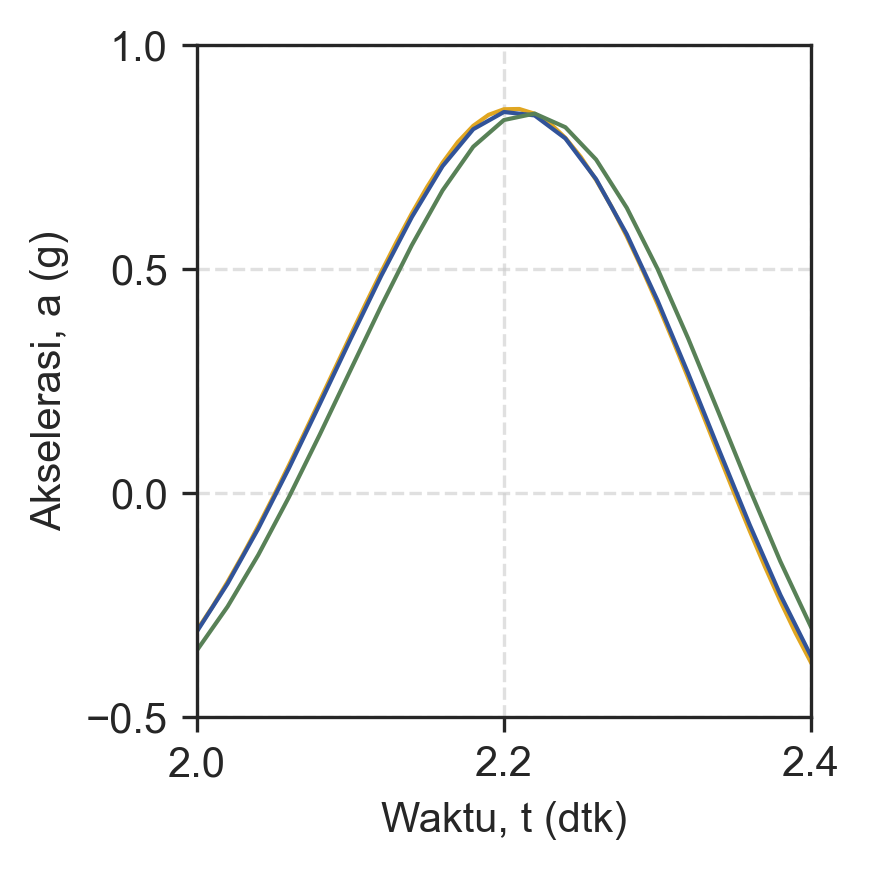

In [17]:
response_seismosignal = pd.read_csv(r'D:\_Publication\2025_Analisis respons spektrum\code\output\elastik_response_seismosignal.csv')
response_python = pd.read_csv(r'D:\_Publication\2025_Analisis respons spektrum\code\output\elastic_response_python.csv')
response_openseespy = pd.read_csv(r'D:\_Publication\2025_Analisis respons spektrum\code\output\elastic_response_openseespy.csv')

PGA_seismo = response_seismosignal[' Accel'].max()
PGA_python = response_python['Acceleration'].max()
PGA_openseespy = response_openseespy['Acceleration'].max()

# Plotting response spectrum
sns.set_style("ticks") # Try other styles: 'darkgrid', 'ticks', 'dark', 'white'

plt.figure(figsize=(3, 3), dpi=300)
plt.plot(response_seismosignal.iloc[:, 0], response_seismosignal.iloc[:, 1], linestyle='-', linewidth=1, color="#e0a621", label=f'Seismosignal (PGA = {PGA_seismo:.3f} g)')
plt.plot(response_python.iloc[:, 0], response_python.iloc[:, 1], linestyle='-', linewidth=1, color="#315399", label=f'Python (PGA = {PGA_python:.3f} g)')
plt.plot(response_openseespy.iloc[:, 0], response_openseespy.iloc[:, 1], linestyle='-', linewidth=1, color="#588157", label=f'OpenSeesPy (PGA = {PGA_openseespy:.3f} g)')
plt.xlabel('Waktu, t (dtk)', fontsize=10)
plt.ylabel('Akselerasi, a (g)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# Control axis limits and intervals
plt.tight_layout()
x_min, x_max = 2, 2.4  
y_min, y_max = -0.5, 1  
x_interval = 0.1      
y_interval = 0.5     
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(np.arange(x_min, x_max + x_interval, x_interval), fontsize=10, fontname='Arial')
plt.yticks(np.arange(y_min, y_max + y_interval, y_interval), fontsize=10, fontname='Arial')    
    
# Set the interval for the x and y axis labels
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.2))  
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.5)) 
plt.tight_layout()
plt.show()

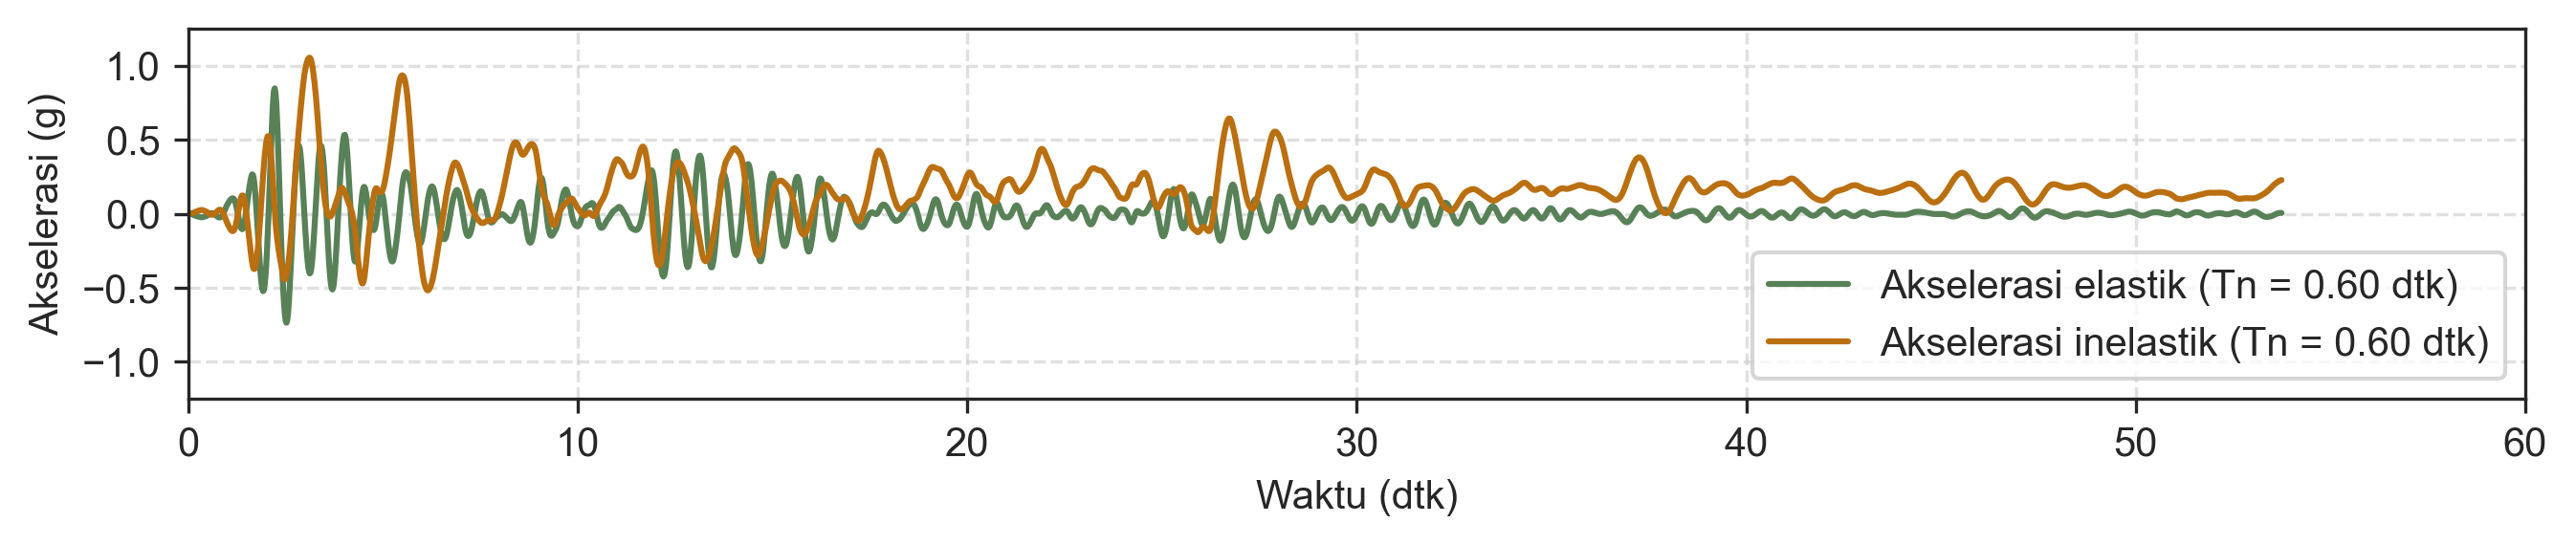

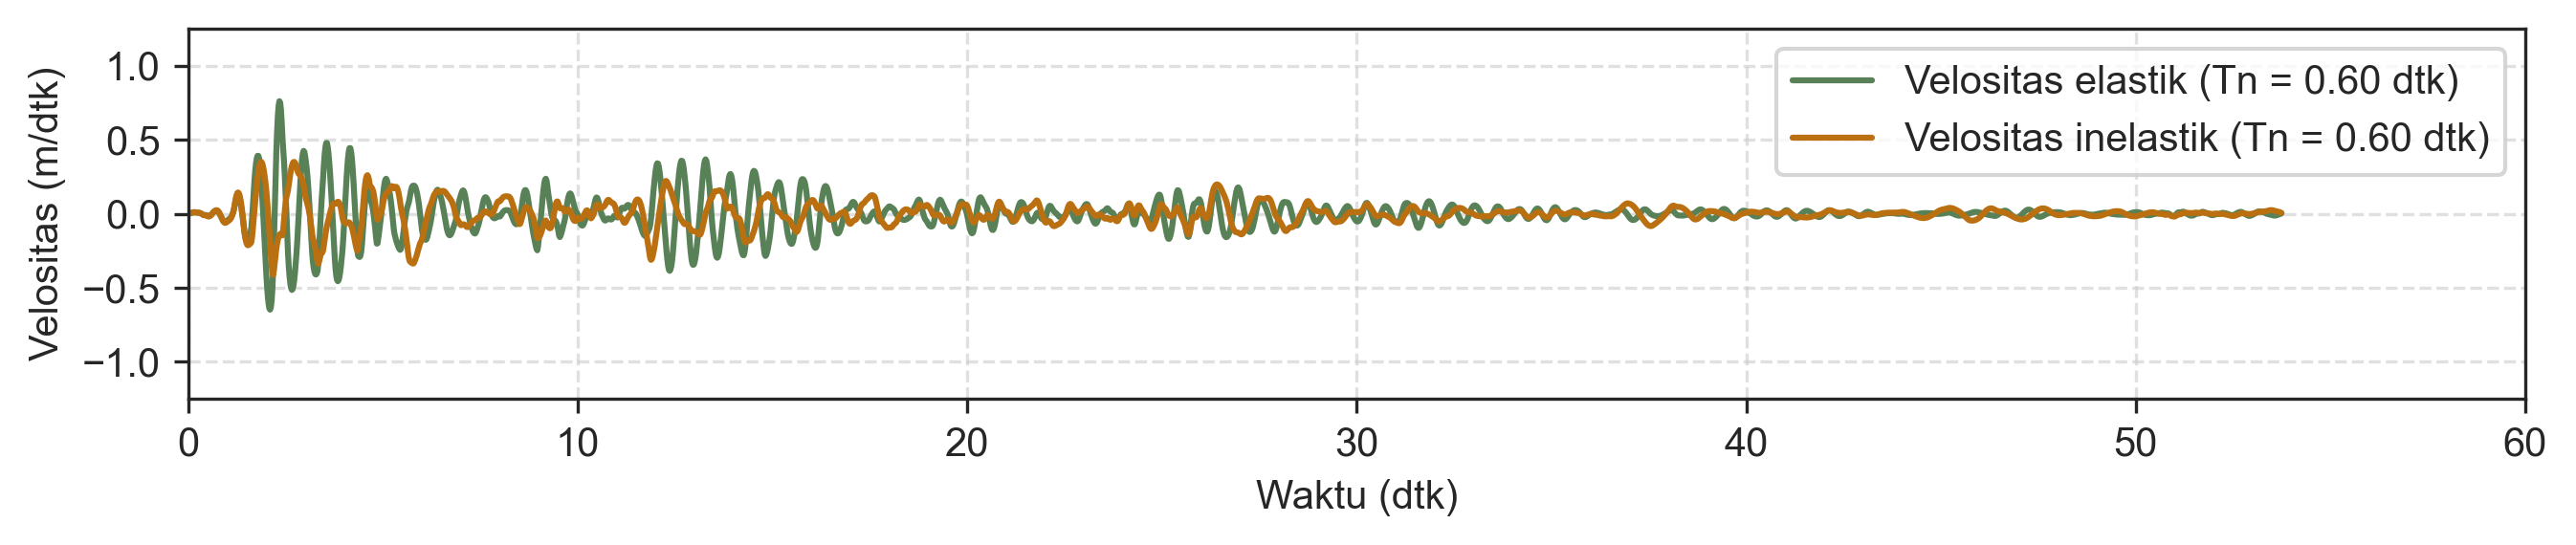

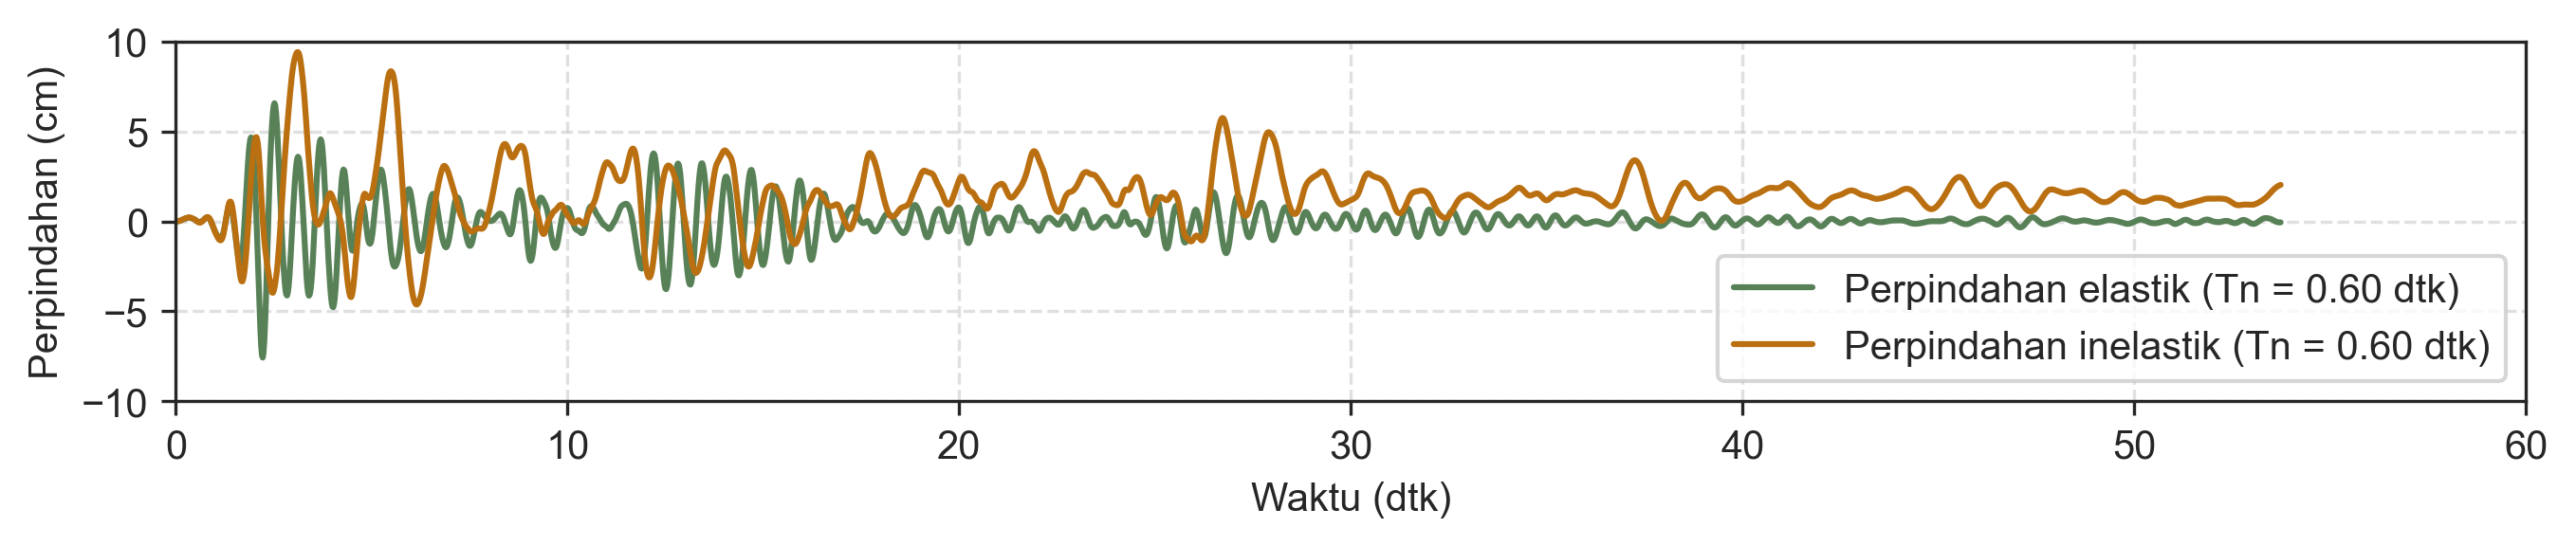

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

el_os = pd.read_csv(r'D:\_Publication\2025_Analisis respons spektrum\code\output\elastic_response_openseespy.csv')
inel_os = pd.read_csv(r'D:\_Publication\2025_Analisis respons spektrum\code\output\inelastic_response_openseespy.csv')

Tn =0.6

# Plotting response spectrum
sns.set_style("ticks") # Try other styles: 'darkgrid', 'ticks', 'dark', 'white'

# Plotting the acceleration response
plt.figure(figsize=(9, 2), dpi=300)
plt.plot(el_os.iloc[:, 0], el_os.iloc[:, 1], label=f'Akselerasi elastik (Tn = {Tn:.2f} dtk)', linestyle='-', linewidth=1.5, color="#588157")
plt.plot(inel_os.iloc[:, 0], inel_os.iloc[:, 1]*-1, label=f'Akselerasi inelastik (Tn = {Tn:.2f} dtk)', linestyle='-', linewidth=1.5, color="#ba6f10")

plt.xlabel('Waktu (dtk)', fontsize=10)
plt.ylabel('Akselerasi (g)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Control axis limits and intervals
plt.tight_layout()
x_min, x_max = 0, 60 
y_min, y_max = -1.25, 1.1 
x_interval = 10 
y_interval = 0.5
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(np.arange(x_min, x_max + x_interval, x_interval), fontsize=10, fontname='Arial')
plt.yticks(np.arange(y_min, y_max + y_interval, y_interval), fontsize=10, fontname='Arial')    
    
# Set the interval for the x and y axis labels
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))  
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.5)) 
plt.show()

# Plotting the velocity response
plt.figure(figsize=(9, 2), dpi=300)
plt.plot(el_os.iloc[:, 0], el_os.iloc[:, 2], label=f'Velositas elastik (Tn = {Tn:.2f} dtk)', linestyle='-', linewidth=1.5, color="#588157")
plt.plot(inel_os.iloc[:, 0], inel_os.iloc[:, 2], label=f'Velositas inelastik (Tn = {Tn:.2f} dtk)', linestyle='-', linewidth=1.5, color="#ba6f10")

plt.xlabel('Waktu (dtk)', fontsize=10)
plt.ylabel('Velositas (m/dtk)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Control axis limits and intervals
plt.tight_layout()
x_min, x_max = 0, 60 
y_min, y_max = -1.25, 1.1 
x_interval = 10 
y_interval = 0.5
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(np.arange(x_min, x_max + x_interval, x_interval), fontsize=10, fontname='Arial')
plt.yticks(np.arange(y_min, y_max + y_interval, y_interval), fontsize=10, fontname='Arial')    
    
# Set the interval for the x and y axis labels
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))  
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.5)) 
plt.show()

# Plotting the velocity response
plt.figure(figsize=(9, 2), dpi=300)
plt.plot(el_os.iloc[:, 0], el_os.iloc[:, 3]*100, label=f'Perpindahan elastik (Tn = {Tn:.2f} dtk)', linestyle='-', linewidth=1.5, color="#588157")
plt.plot(inel_os.iloc[:, 0], inel_os.iloc[:, 3]*100, label=f'Perpindahan inelastik (Tn = {Tn:.2f} dtk)', linestyle='-', linewidth=1.5, color="#ba6f10")

plt.xlabel('Waktu (dtk)', fontsize=10)
plt.ylabel('Perpindahan (cm)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Control axis limits and intervals
plt.tight_layout()
x_min, x_max = 0, 60 
y_min, y_max = -10, 10 
x_interval = 10 
y_interval = 5
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(np.arange(x_min, x_max + x_interval, x_interval), fontsize=10, fontname='Arial')
plt.yticks(np.arange(y_min, y_max + y_interval, y_interval), fontsize=10, fontname='Arial')    
    
# Set the interval for the x and y axis labels
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))  
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(5)) 
plt.show()